# BACKORDER PREDICTION

## 1.BUSSINESS PROBLEM

##### source:https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning

##### Data:https://github.com/rodrigosantis1/backorder_prediction/blob/master/dataset.rar

##### problem statement:
We can build a predictive model which predicts whether the products
will experience backorders giving various information.Model can
detect various patterns related to backorders and predict it before its
occurrence.Then we can overcome the problem like:too much supply
increase inventory cost and too little supply increases the risk that
customer may cancel order.Production can then adjust to minimize
delays.This method enables the maximum product to get in the hands
of customers at the lowest cost of organization.

## Source/Useful links

Some articles and references blogs

1:https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00345-2

2:https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

3:https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

### Business Objective and constraints

1.No low-latency requirement.

2.Errors can impact business very much.

3.Probability of a data point belonging to each class is needed.

4.Interpretability is needed.

# 2.Machine learning Problem

We have two data files (i)Kaggle_Test_Dataset_v2.csv
                       (ii)Kaggle_Training_Dataset_v2.csv

#### Data files information in both the files



sku - Random ID for the product

national_inv - Current inventory level for the part

lead_time - Transit time for product (if available)

in_transit_qty - Amount of product in transit from source

forecast_3_month - Forecast sales for the next 3 months

forecast_6_month - Forecast sales for the next 6 months

forecast_9_month - Forecast sales for the next 9 months

sales_1_month - Sales quantity for the prior 1 month time period

sales_3_month - Sales quantity for the prior 3 month time period

sales_6_month - Sales quantity for the prior 6 month time period

sales_9_month - Sales quantity for the prior 9 month time period

min_bank - Minimum recommend amount to stock

potential_issue - Source issue for part identified

pieces_past_due - Parts overdue from source

perf_6_month_avg - Source performance for prior 6 month period

perf_12_month_avg - Source performance for prior 12 month period

local_bo_qty - Amount of stock orders overdue

deck_risk - Part risk flag

oe_constraint - Part risk flag

ppap_risk - Part risk flag

stop_auto_buy - Part risk flag

rev_stop - Part risk flag

went_on_backorder - Product actually went on backorder. This is the target value.

#### Example of a data point

sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk	oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No

#### Mapping the real world problem to Machine learning problem

There two category in target variable so it is a binary classification problem.

#### Performance metrics

We should use micro precision ,recall and F1-score as Performance matrix  and
should not use accuracy as data is highly imbalanced.

As data is highly imbalanced for negative class,we should concern more about how model is doing for postive class.Hence we should use precision and recall ,and we want both to be high so F1 score .

We should do macro value of all the three as simple precison ,recall and F1 score can not fetch information if data is higly imbalanced and to get information about how model is doing on negative class too.


F1 score because we want both precision and recall should be high in this
case.


We can build some base model like logistic regression , decision tree ,naive
bayes and some ensemble model like Random Forest ,GBDT with
hyperparameter tuning and then go with the model which will give best
results.


#### Machine Learning Objective and Constarins

Objective:Predict the probability of each data-point belonging to each of the two classes.

Constraints:* Interpretability * Class probabilities are needed. * Penalize the errors in class probabilites => Metric is Log-loss. * No Latency constraints.

# 3.DATA PREPROCESSING
(Objective:Prepare the raw data to a modified version and store it in a new file so that it can be further used for Exploratory Data Analysis and Data modeling)

1.Drop if any row has all the null values as this data is of no use.Drop any column if any column has all unique values as this column is more likely to be product id & no impact on target variable






In [180]:
import pandas as pd

In [181]:
df = pd.read_csv('Kaggle_Training_Dataset_v2.csv')

C:\Users\amiya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [182]:
df.went_on_backorder.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [183]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [184]:
# !pip3 install pandas_profiling

In [185]:
# import pandas_profiling
# profile =pandas_profiling.ProfileReport(df)
# profile.to_file("output.html")

In [186]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As last row has all the null values we can drop it

In [187]:
df.drop(1687860, inplace=True)

It seems sku has unique values for each row this may be prouct-id for each prouct.Hence this column can be dropped.

In [188]:
len(df.sku.unique())

1687860

As there are total 1687860 unique values in sku & and there total 1687860 number of rows ,all the values are unique.Hence we can drop this.

In [189]:
df.drop(['sku'], axis = 1,inplace=True)

In [190]:
categorical = df.select_dtypes(include = ['object']).columns

## Handling Outliers

We can detect outliers by box plot .The points which are below of low whiskers and above of upper whiskers are more likely to be 
outlier ,Hence we should remove that

###### for lead time

<AxesSubplot:xlabel='lead_time'>

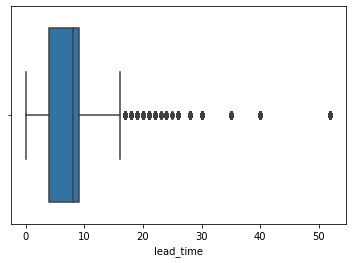

In [191]:
import seaborn as sns
sns.boxplot(df.lead_time)

In [192]:
#https://stackoverflow.com/questions/53312719/python-function-to-return-index-of-outlier-values-in-two-dimensional-numpy-array
# We have to define a function to get the boundry point..
def iqr(column):
    q75, q25  = np.percentile(column, [75,25])
#     print(q75, q25)
    iqr = q75 - q25
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    return lower,upper

In [193]:
# df.lead_time
import numpy as np
lead_time_upper = iqr(df.lead_time)[1]
# print(lead_time_upper)
outlier_lead_time= df[df.lead_time > lead_time_upper]
outlier_lead_time.went_on_backorder.value_counts()

Series([], Name: went_on_backorder, dtype: int64)

##### As  there are significant amount of point we can not remove this point,these point may impact target variable.
##### we should do robust scalling so that the resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

##### for in_transit_qty

<AxesSubplot:xlabel='in_transit_qty'>

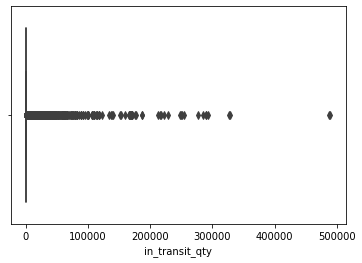

In [194]:
sns.boxplot(df.in_transit_qty)

In [195]:
outlier_in_transit_qty= df[df.in_transit_qty > 250000]
outlier_in_transit_qty.went_on_backorder.value_counts()

No    11
Name: went_on_backorder, dtype: int64

As count is less we can delete it.

In [196]:
df = df.drop(outlier_in_transit_qty.index)

<AxesSubplot:xlabel='min_bank'>

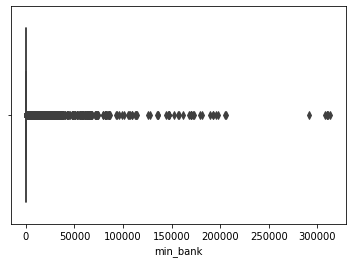

In [197]:
sns.boxplot(df.min_bank)

In [198]:
outlier_min_bank= df[df.min_bank > 200000]
outlier_min_bank.went_on_backorder.value_counts()

No    8
Name: went_on_backorder, dtype: int64

Here also count is less so we can delete it

In [199]:
df = df.drop(outlier_min_bank.index)

<AxesSubplot:xlabel='national_inv'>

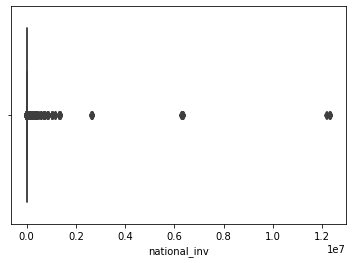

In [200]:
sns.boxplot(df.national_inv)

In [201]:
outlier_national_inv= df[df.national_inv > 0.2e07]
outlier_national_inv.went_on_backorder.value_counts()

No    21
Name: went_on_backorder, dtype: int64

Here also count is less ,so we can delete it

In [202]:
df = df.drop(outlier_national_inv.index)

<AxesSubplot:xlabel='perf_12_month_avg'>

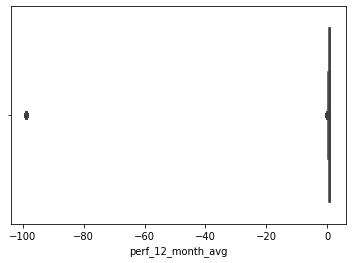

In [203]:
sns.boxplot(df.perf_12_month_avg)

In [204]:
perf_12_month_avg_lower = iqr(df.perf_12_month_avg)[0]
outlier_perf_12_month_avg= df[df.perf_12_month_avg < perf_12_month_avg_lower]
outlier_perf_12_month_avg.went_on_backorder.value_counts()

No     194511
Yes      1405
Name: went_on_backorder, dtype: int64

<AxesSubplot:xlabel='perf_6_month_avg'>

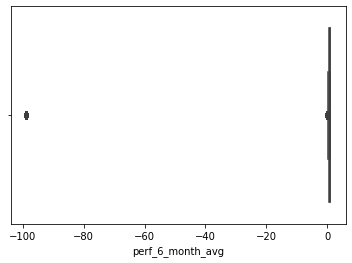

In [205]:
sns.boxplot(df.perf_6_month_avg)

In [206]:
perf_6_month_avg_lower = iqr(df.perf_6_month_avg)[0]
outlier_perf_6_month_avg= df[df.perf_6_month_avg < perf_6_month_avg_lower]
outlier_perf_6_month_avg.went_on_backorder.value_counts()

No     182945
Yes      1300
Name: went_on_backorder, dtype: int64

As there so many points below whiskers for perf_12_month_avg and perf_12_month_avg  they may not be outliers and can give some information about target variable so we have to rebust scale them

## Convert yes/no to 1/0 for target variable

In [207]:
df.went_on_backorder.replace(to_replace=['No', 'Yes'], value=[0, 1])

0          0
1          0
2          0
3          0
4          0
          ..
1687855    0
1687856    0
1687857    1
1687858    0
1687859    0
Name: went_on_backorder, Length: 1687820, dtype: int64

#### SAVE CLEANED DATA FOR MODELING AND EXPLORATOTY DATA ANALYSIS

In [111]:
df.to_csv('Backorder_preprocessed_data.csv',index=False)

#### So at the end data preprocessing we have 
##### (i)handled the outliers
##### (ii)modified target variable(yes/no -> 1/0)
##### (iii)saved the clean data for further processing.

# 4. EDA(EXPLORATORY DATA ANALYSIS)

In [30]:
df = pd.read_csv('Backorder_preprocessed_data.csv')

## UNIVARIATE ANALYSIS (ON REAL VALUED FEATURE)

Count,Mean,Standard deviation,quantiles

In [ ]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687820e+06,1.586934e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06,1.687820e+06
mean,4.015493e+02,7.872276e+00,4.101183e+01,1.730614e+02,3.345846e+02,4.917710e+02,5.281043e+01,1.653184e+02,3.251692e+02,5.011992e+02,4.915809e+01,1.878091e+00,-6.870822e+00,-6.437289e+00,6.216546e-01
std,7.307246e+03,7.056093e+00,9.530284e+02,4.595840e+03,8.873711e+03,1.304863e+04,1.688586e+03,4.388081e+03,8.464313e+03,1.326796e+04,9.067749e+02,1.910759e+02,2.655439e+01,2.584225e+01,3.327677e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.370327e+06,5.200000e+01,2.494590e+05,1.427612e+06,2.446072e+06,3.760840e+06,7.417740e+05,1.105478e+06,2.145715e+06,3.205172e+06,1.976310e+05,1.376250e+05,1.000000e+00,1.000000e+00,1.253000e+04


#### As we can see the scale of the features is  not same so the features should be scaled before modeling.

In [ ]:
# (Q) how many data-points and features?
print (df.shape)

(1687820, 22)


In [ ]:
#(Q) What are the column names in our dataset?
print (df.columns)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 
df["went_on_backorder"].value_counts()

No     1676527
Yes      11293
Name: went_on_backorder, dtype: int64

###### so this is a imbalanced dataset as the number of data points for one class is much greater than the other.So we should use some sampling technique while modeling.

## BOX PLOTS

In [ ]:
import numpy as np
backorder_0 = df.loc[df["went_on_backorder"] == 0]
backorder_1= df.loc[df["went_on_backorder"] == 1]

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_9_month'>

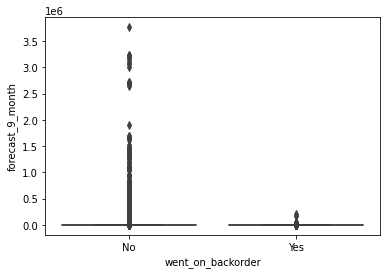

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df)

from the above box plot we can not give any conclusion So we have to zoom into this.


Zooming into 90th  to 100th percentile

In [ ]:
forecast_9_month = list(df['forecast_9_month'])
forecast_9_month.sort()
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(forecast_9_month,90+i))

90 percentile value is 261.0
91 percentile value is 322.0
92 percentile value is 402.0
93 percentile value is 504.0
94 percentile value is 663.0
95 percentile value is 895.0
96 percentile value is 1220.0
97 percentile value is 1803.0
98 percentile value is 2988.0
99 percentile value is 6304.810000000056
100 percentile value is 3760840.0


In [ ]:
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(forecast_9_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 8.0
80 percentile value is 48.0
90 percentile value is 261.0
100 percentile value is 3760840.0


In [ ]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(forecast_9_month,99+(i/100)))

99.1 percentile value is 7050.0
99.2 percentile value is 7974.0
99.3 percentile value is 9042.0
99.4 percentile value is 10584.0
99.5 percentile value is 12600.0
99.6 percentile value is 16190.343999999575
99.7 percentile value is 22200.0
99.8 percentile value is 32564.343999999575
99.9 percentile value is 57900.0
100.0 percentile value is 3760840.0


##### From the above analysis it is clear that 90% of data having forecast_9_month as 270 only & 99.1 % data having forcast_9_month as 7200 .So we should plot box plot between 0 to 90th percentile but this might happen for class imbalance.

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_9_month'>

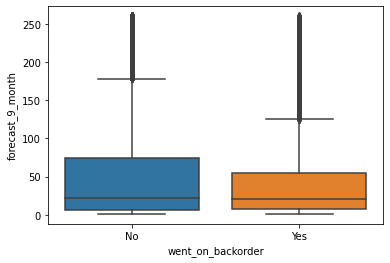

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month',data=df[(df.forecast_9_month < df.forecast_9_month.quantile(0.90)) &(df. forecast_9_month>df.forecast_9_month.quantile(0))])

##### from the above box plot it can be said that if forcast_9_month is more than 50,then product is not likely to get backordered  but this might too happen for class imbalancing.,And still there are some outliers after considering 0 to 90th percentile value

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_6_month'>

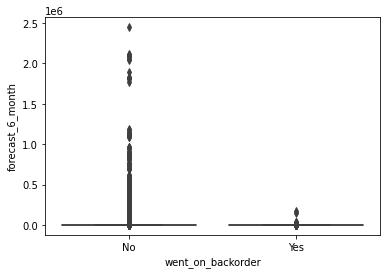

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=df)

Box plot of forecast_6_month may  have the same problem as forecast_9_month ,so lets check with 0 to 90 th percentile value.

In [ ]:
forecast_6_month = list(df['forecast_6_month'])
forecast_6_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(forecast_6_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 5.0
80 percentile value is 30.0
90 percentile value is 176.0
100 percentile value is 2446072.0


In [ ]:
for i in range(1,11):
    print(80+i,'percentile value is',np.percentile(forecast_6_month,80+i))

81 percentile value is 35.0
82 percentile value is 40.0
83 percentile value is 48.0
84 percentile value is 57.0
85 percentile value is 68.0
86 percentile value is 80.0
87 percentile value is 99.0
88 percentile value is 117.0
89 percentile value is 143.0
90 percentile value is 176.0


As 80th percentile value is only 30 and 90th percentile value is 180 ,we should exclude 90-100th percentile value.

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_6_month'>

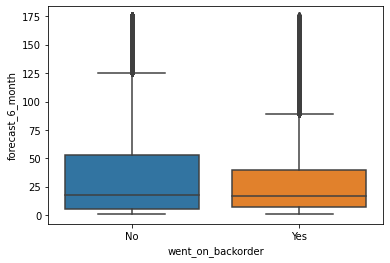

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month',data=df[(df.forecast_6_month < df.forecast_6_month.quantile(0.90)) &(df. forecast_6_month>df.forecast_6_month.quantile(0))])

So from above box plot it can be said that if forecast_6_month more than 35 ,then the product is not likely to get backordered.But this might happen for class imbalancing.
And there are some outliers after removing 90-100th percentile data points.

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_3_month'>

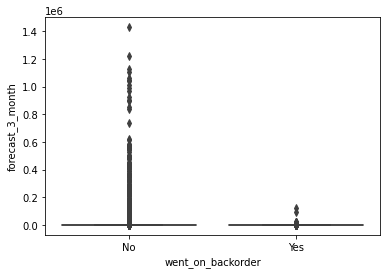

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=df)

In [ ]:
forecast_3_month = list(df['forecast_3_month'])
forecast_3_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(forecast_3_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 1.0
80 percentile value is 12.0
90 percentile value is 83.0
100 percentile value is 1427612.0


In [ ]:
for i in range(1,11):
    print(80+i,'percentile value is',np.percentile(forecast_3_month,80+i))

81 percentile value is 14.0
82 percentile value is 17.0
83 percentile value is 20.0
84 percentile value is 24.0
85 percentile value is 30.0
86 percentile value is 36.0
87 percentile value is 45.0
88 percentile value is 54.0
89 percentile value is 66.0
90 percentile value is 83.0


<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_3_month'>

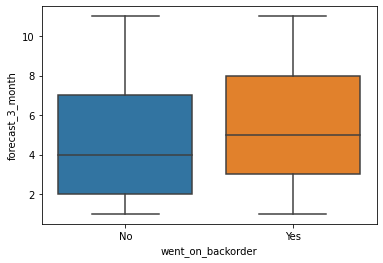

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month',data=df[(df.forecast_3_month < df.forecast_3_month.quantile(0.80)) &(df. forecast_3_month>df.forecast_3_month.quantile(0))])

##### When forecast_3_month is  more than 7 then ,product is more likely to get backordered.

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_1_month'>

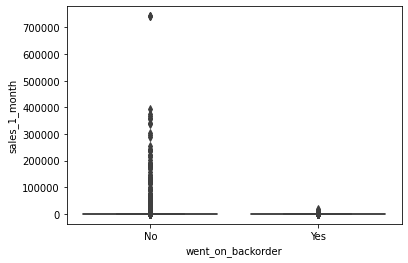

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=df)

In [ ]:
sales_1_month = list(df['sales_1_month'])
sales_1_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(sales_1_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 1.0
70 percentile value is 2.0
80 percentile value is 8.0
90 percentile value is 34.0
100 percentile value is 741774.0


<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_1_month'>

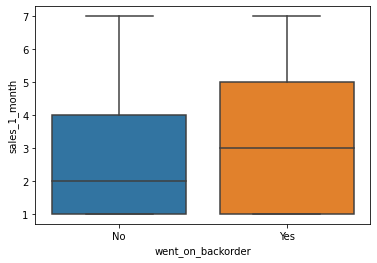

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_1_month',data=df[(df.sales_1_month< df.sales_1_month.quantile(0.80)) &(df. sales_1_month>df.sales_1_month.quantile(0))])

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_3_month'>

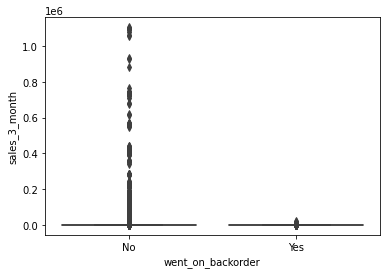

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=df)

In [ ]:
sales_3_month = list(df['sales_3_month'])
sales_3_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(sales_3_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 1.0
60 percentile value is 3.0
70 percentile value is 9.0
80 percentile value is 27.0
90 percentile value is 114.0
100 percentile value is 1105478.0


<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_3_month'>

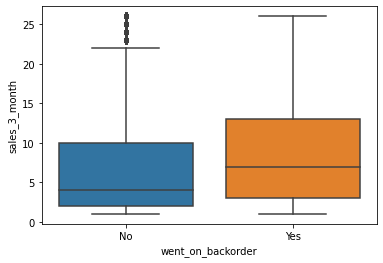

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_3_month',data=df[(df.sales_3_month< df.sales_3_month.quantile(0.80)) &(df. sales_3_month>df.sales_3_month.quantile(0))])

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_6_month'>

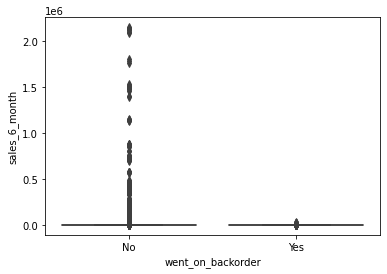

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_6_month', data=df)

In [ ]:
sales_6_month = list(df['sales_6_month'])
sales_6_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(sales_6_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 1.0
50 percentile value is 2.0
60 percentile value is 7.0
70 percentile value is 18.0
80 percentile value is 55.0
90 percentile value is 232.0
100 percentile value is 2145715.0


<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_6_month'>

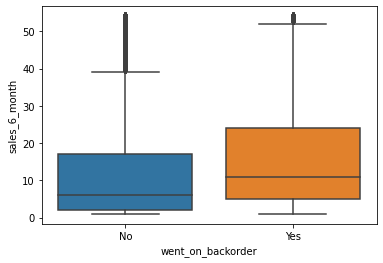

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_6_month',data=df[(df.sales_6_month< df.sales_6_month.quantile(0.80)) &(df. sales_6_month>df.sales_6_month.quantile(0))])

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_9_month'>

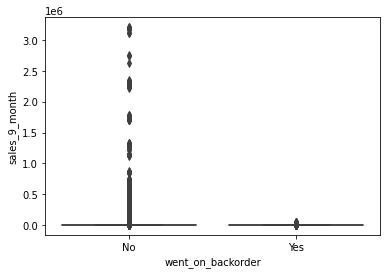

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=df)

In [ ]:
sales_9_month = list(df['sales_9_month'])
sales_9_month.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(sales_9_month,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 1.0
50 percentile value is 4.0
60 percentile value is 10.0
70 percentile value is 27.0
80 percentile value is 84.0
90 percentile value is 354.0
100 percentile value is 3205172.0


<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_9_month'>

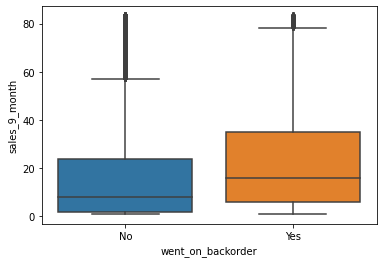

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_9_month',data=df[(df.sales_9_month< df.sales_9_month.quantile(0.80)) &(df. sales_9_month>df.sales_9_month.quantile(0))])

### Box plots sales shows that there are very few data points after 80th percentiles ,so we have zoomed to 0 to 80th percentile to plot the box plot & and for those  box plot it can be concluded that if sales in 1,3,6,9 month is high then the product is more likely to get backordered.

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_6_month_avg'>

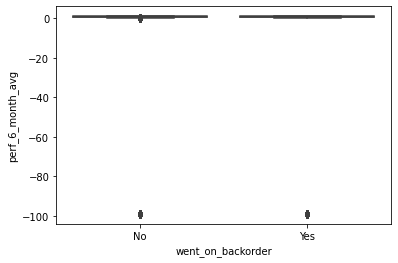

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=df)

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_6_month_avg'>

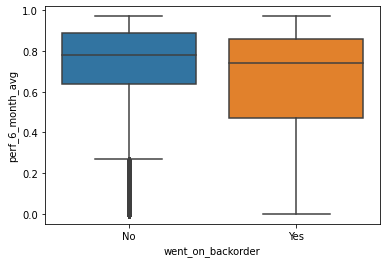

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg',data=df[(df.perf_6_month_avg< df.perf_6_month_avg.quantile(0.80)) &(df. perf_6_month_avg>df.perf_6_month_avg.quantile(0))])

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_12_month_avg'>

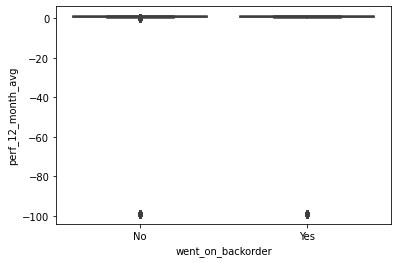

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=df)

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_12_month_avg'>

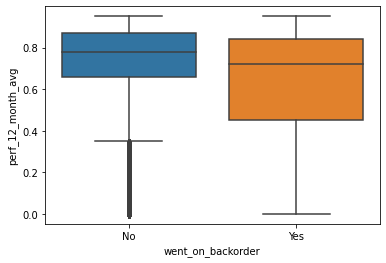

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg',data=df[(df.perf_12_month_avg< df.perf_12_month_avg.quantile(0.80)) &(df. perf_12_month_avg>df.perf_12_month_avg.quantile(0))])

### Boxplot of performance in past 6 months and 12 months depicts that if it is low,then the product is more likely to get backordered

<AxesSubplot:xlabel='went_on_backorder', ylabel='min_bank'>

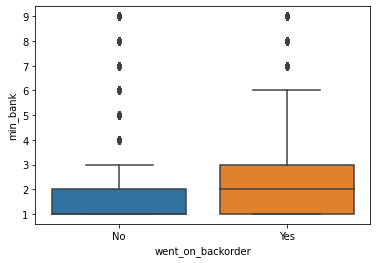

In [ ]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=df[(df.min_bank < df.min_bank.quantile(0.8))  & (df.min_bank > df.min_bank.quantile(0))])

#### if min bank is more than 3 ,then product is more likely to get backordered.

In [ ]:
local_bo_qty = list(df['local_bo_qty'])
local_bo_qty.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(local_bo_qty,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 12530.0


As 90% of the data points have local_bo_qty as 0 ,we can drop this feature.

<AxesSubplot:xlabel='went_on_backorder', ylabel='in_transit_qty'>

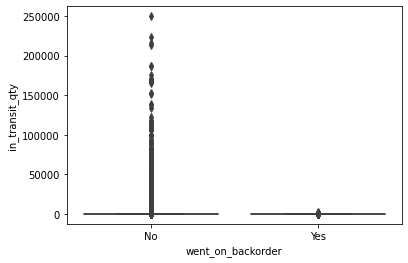

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=df)


As no conclusion can be made we have to zoom into the boxplot

In [ ]:
in_transit_qty = list(df['in_transit_qty'])
in_transit_qty.sort()
for i in range(0,110,10):
    print(i,'percentile value is',np.percentile(in_transit_qty,i))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 1.0
90 percentile value is 16.0
100 percentile value is 249459.0


As 90th percentile is 16 and 100 percentile is 249459 ,we san say that there are very less point in that range hence we can exclude them.

<AxesSubplot:xlabel='went_on_backorder', ylabel='in_transit_qty'>

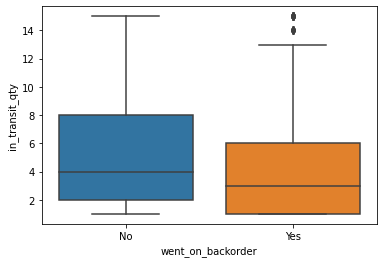

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty',data=df[(df.in_transit_qty< df.in_transit_qty.quantile(0.90)) &(df. in_transit_qty>df.in_transit_qty.quantile(0))])

So if in_transit_qty is high(less than 2) then product is likly to get backorderd, but still tehre are some ouliers after removing 90-100 th percentile data.

## HISTOGRAM AND PDF

C:\Users\amiya\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


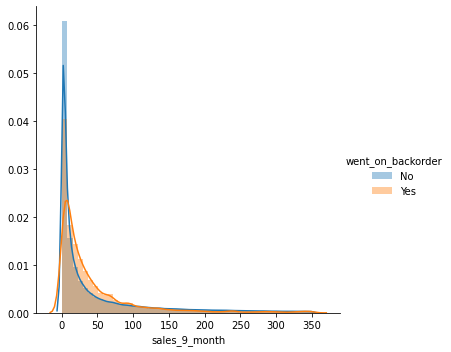

In [ ]:
sns.FacetGrid(df[(df.sales_9_month< df.sales_9_month.quantile(0.90)) &(df. sales_9_month>df.sales_9_month.quantile(0))], hue="went_on_backorder", size=5) \
   .map(sns.distplot, "sales_9_month") \
   .add_legend();


#### As we have seen in box plot there is no separtion between positive and negative class for any feature,we can not make any inference(Weather any feature is efficient to enough to classify positive & negative class) from histogram and pdf of any features.

#### So for all the features pdfs will be overlapped ,so we can skip doing Histogram & pdf analysis.

#### But from the above distriution we can see that it is right skwed ,so we can do some Mathematical transform like log, exp, sqrt, ^2, box-cox and check whether it will be normal distribution or not

<ipython-input-152-24ed3c9c8d70>:4: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.sales_9_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


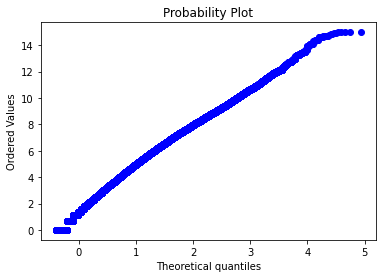

In [ ]:
#https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy
from scipy import stats
import pylab 
stats.probplot(np.log(df.sales_9_month.values), dist="norm", plot=pylab)
pylab.show()

<ipython-input-153-c383888fd1f8>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.sales_6_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


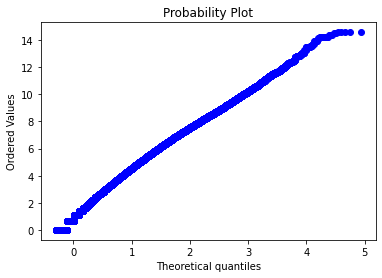

In [ ]:
stats.probplot(np.log(df.sales_6_month.values), dist="norm", plot=pylab)
pylab.show()

<ipython-input-154-d6426fb3899a>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.sales_3_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


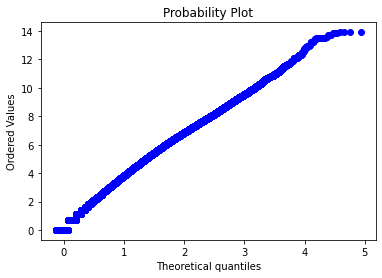

In [ ]:
stats.probplot(np.log(df.sales_3_month.values), dist="norm", plot=pylab)
pylab.show()

<ipython-input-155-d1044bb950fb>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.sales_1_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


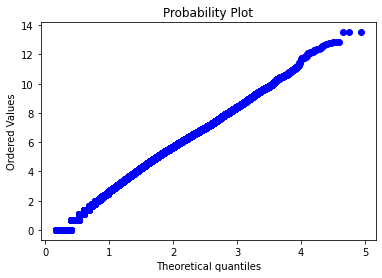

In [ ]:
stats.probplot(np.log(df.sales_1_month.values), dist="norm", plot=pylab)
pylab.show()

#### After applying log transformation all the sales features follow follow normal distribution as they are in same line in QQ plot with normal distribution.

#### these skewed values can imapact modelling so we should remove the extreme values as they are mostly present in majority class

<ipython-input-156-87a78919bb51>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.forecast_3_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


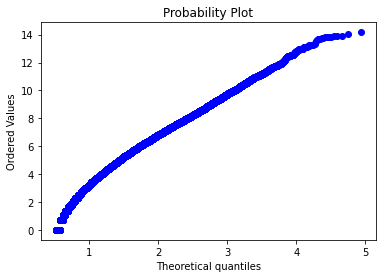

In [ ]:
stats.probplot(np.log(df.forecast_3_month.values), dist="norm", plot=pylab)
pylab.show()

<ipython-input-157-83809d9fd7b9>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.forecast_6_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


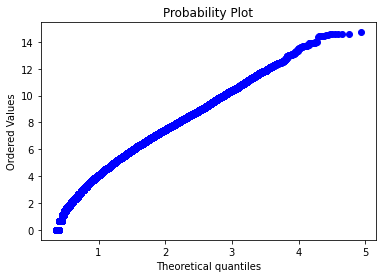

In [ ]:
stats.probplot(np.log(df.forecast_6_month.values), dist="norm", plot=pylab)
pylab.show()

<ipython-input-158-4cf026e88b2b>:1: RuntimeWarning: divide by zero encountered in log
  stats.probplot(np.log(df.forecast_9_month.values), dist="norm", plot=pylab)
C:\Users\amiya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\amiya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


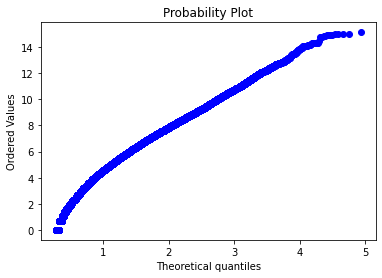

In [ ]:
stats.probplot(np.log(df.forecast_9_month.values), dist="norm", plot=pylab)
pylab.show()

We should apply log transform on all the forecast features to as after following log transform quantiles are alomst in same line with quantiles of normal distribution,So that extreme outliers can be removed

In [208]:
#Lst of columns having right skewed data / Features to be log transformed
skewed_right_features = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

## Bivariate Analysis

##### Pair plot

As there are total 17 real valued features we can not plot pair at one time otherwise there will be 17C2 number of plots which will be very hard to interpreat and computationally expensive also.
So we will draw pair plot by taking subsets of features and anlayse them

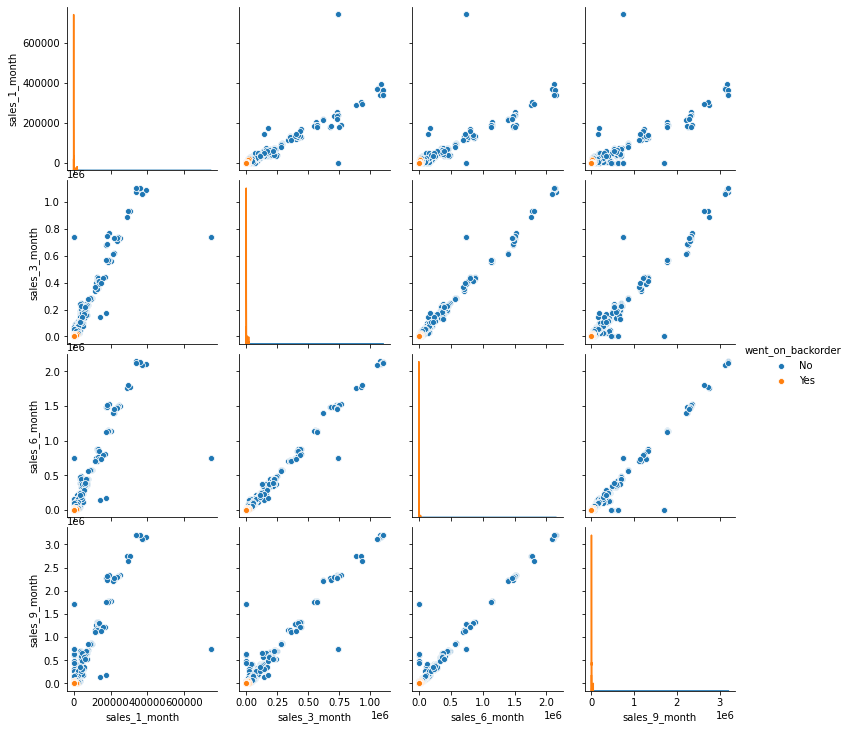

In [ ]:
##Q) IF ANY TWO MONTHS OF SALES CAN CLASSIFY BACK ORDERS
sns.pairplot(df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']],hue = 'went_on_backorder')

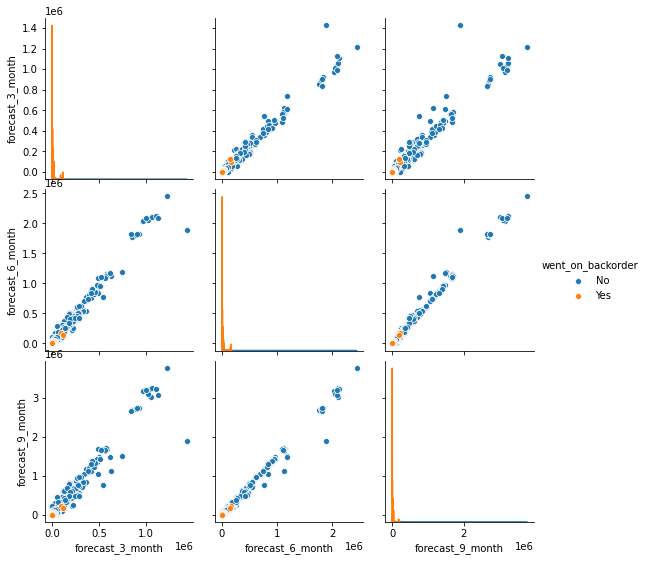

In [ ]:
##Q) IF ANY TWO MONTHS OF FORECAST CAN CLASSIFY BACK ORDERS
sns.pairplot(df[['forecast_3_month','forecast_6_month','forecast_9_month','went_on_backorder']],hue = 'went_on_backorder')

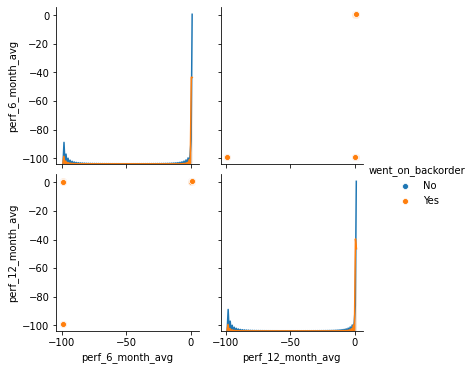

In [ ]:
##Q) IF performance CAN CLASSIFY BACK ORDERS
sns.pairplot(df[['perf_6_month_avg','perf_12_month_avg','went_on_backorder']],hue = 'went_on_backorder')

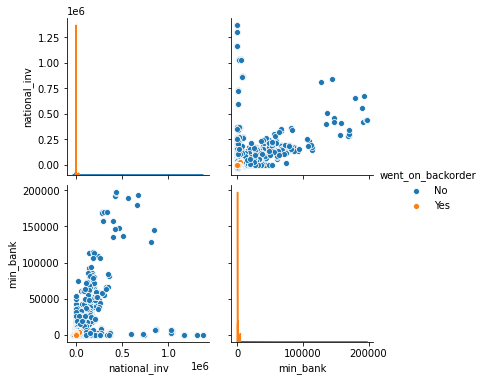

In [ ]:
##Q) if national_inv and min_bank cak classify back orders
sns.pairplot(df[['national_inv','min_bank','went_on_backorder']],hue = 'went_on_backorder')

###### As data is highly imbalanced we can not infer much from the pair plots.One thing we can infer is for any two months if sales is higher or forecast is higher the product is not liley to get backordered but still sthere is a chance that that region points are overlapping.

##### For past 6 months and 12 month performance avg ,we can not infer much as both the class are overlapping significanly.


## MODEL BASED ANALYSIS FOR CATEGORICAL FEATURE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [ ]:
y_true = df['went_on_backorder'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [ ]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 1080204
Number of data points in test data: 337564
Number of data points in cross validation data: 270052


We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set

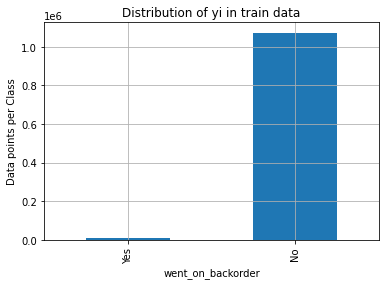

Number of data points in class 2 : 1072977 ( 99.331 %)
Number of data points in class 1 : 7227 ( 0.669 %)
--------------------------------------------------------------------------------


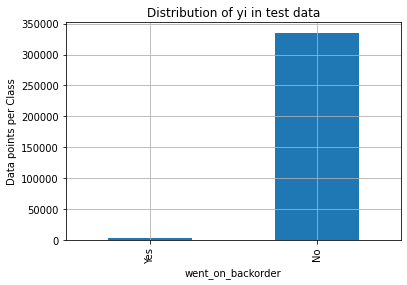

Number of data points in class 2 : 335305 ( 99.331 %)
Number of data points in class 1 : 2259 ( 0.669 %)
--------------------------------------------------------------------------------


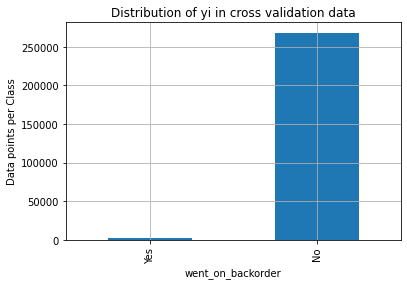

Number of data points in class 2 : 268245 ( 99.331 %)
Number of data points in class 1 : 1807 ( 0.669 %)


In [ ]:
train_class_distribution = train_df['went_on_backorder'].value_counts().sort_values()
test_class_distribution = test_df['went_on_backorder'].value_counts().sort_values()
cv_class_distribution = cv_df['went_on_backorder'].value_counts().sort_values()
# print(train_class_distribution)

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('went_on_backorder')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('went_on_backorder')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('went_on_backorder')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


##### How good is this rev_stop  feature in predicting y_i?

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only rev_stop

we have used logistic regression as it is good for one-hot encoded feature.

In [ ]:
# one-hot encoding of rev_stop feature.
from sklearn.feature_extraction.text import CountVectorizer
rev_stop_vectorizer = CountVectorizer()
train_rev_stop_feature_onehotCoding = rev_stop_vectorizer.fit_transform(train_df['rev_stop'])
test_rev_stop_feature_onehotCoding = rev_stop_vectorizer.transform(test_df['rev_stop'])
cv_rev_stop_feature_onehotCoding = rev_stop_vectorizer.transform(cv_df['rev_stop'])

In [ ]:
print("train_rev_stop_feature_onehotCoding is converted feature using one-hot encoding method. The shape of rev_stop feature:", train_rev_stop_feature_onehotCoding.shape)

train_rev_stop_feature_onehotCoding is converted feature using one-hot encoding method. The shape of rev_stop feature: (1080204, 2)


##### As data is highly imbalanced we have to hanlde it before building any model

In [ ]:
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_rev_stop_feature_onehotCoding, y_train)
print(Counter(y_over))

Counter({'No': 1072977, 'Yes': 1072977})


##### Let's build a model 

For values of alpha =  1e-05 The log loss is: 0.6931034810477966
For values of alpha =  0.0001 The log loss is: 0.6931034810504161
For values of alpha =  0.001 The log loss is: 0.6931034810620882
For values of alpha =  0.01 The log loss is: 0.6931034810588006
For values of alpha =  0.1 The log loss is: 0.6931034810576511
For values of alpha =  1 The log loss is: 0.6931034810591895


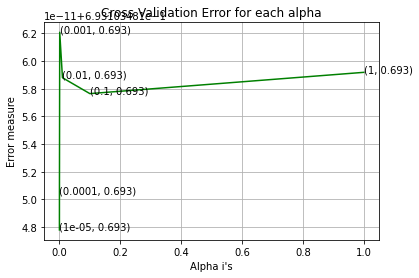

For values of best alpha =  1e-05 The train log loss is: 0.6929921156814293
For values of best alpha =  1e-05 The cross validation log loss is: 0.6931034810477966
For values of best alpha =  1e-05 The test log loss is: 0.693063939865386


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_curve, auc
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_over, y_over)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_over, y_over )
    predict_y = sig_clf.predict_proba(cv_rev_stop_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_over,  y_over)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_over, y_over)

predict_y_train = sig_clf.predict_proba(X_over)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_over, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_rev_stop_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(test_rev_stop_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))



As the data is highly imbalanced ,we can not be very sure regarding whether this feature is usefull for classification or not
as data is highly imbalnaced,we have to use ROC-AUC or F1 score 

In [ ]:
predict_y_train_roc=clf.predict(X_over)
predict_y_test_roc=clf.predict(test_rev_stop_feature_onehotCoding)

In [ ]:
y_train_one_hot=[]
for each in y_over:
    if each=='No':
        y_train_one_hot.append(0)
    else:
        y_train_one_hot.append(1)
y_test_one_hot=[]
for each in y_test:
    if each=='No':
        y_test_one_hot.append(0)
    else:
        y_test_one_hot.append(1)


In [ ]:
predict_y_train_roc_one_hot=[]
for each in predict_y_train_roc:
    if each=='No':
        predict_y_train_roc_one_hot.append(0)
    else:
        predict_y_train_roc_one_hot.append(1)
predict_y_test_roc_one_hot=[]
for each in predict_y_test_roc:
    if each=='No':
        predict_y_test_roc_one_hot.append(0)
    else:
        predict_y_test_roc_one_hot.append(1)

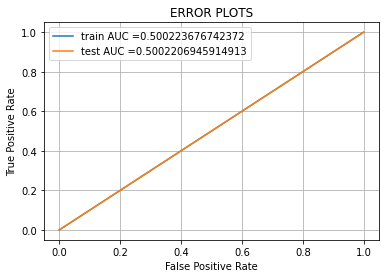

In [ ]:
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train_one_hot,predict_y_train_roc_one_hot)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test_one_hot, predict_y_test_roc_one_hot)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_train=f1_score(y_train_one_hot, predict_y_train_roc_one_hot,average='macro')
f1_test=f1_score(y_test_one_hot, predict_y_test_roc_one_hot,average='macro')
print("F1-SCORE FOR TRAIN DATA IS :"+str(f1_train)+" F1-SCORE FOR TEST DATA IS :"+str(f1_test))

F1-SCORE FOR TRAIN DATA IS :0.33383020013832054 F1-SCORE FOR TEST DATA IS :0.007091669163008153


##### As for this feature roc-auc & f1 score is low ,this feature has no significant impact on target variable

#### WE CAN DO THE SAME ANALYSIS FOR REAMINING 3 CATEGORICAL FEATURES AND CHECK WHEATRE THEY HAVE SIGNIFICANT IMPACT ON TARGET VARIABLE OR NOT

In [ ]:
# one-hot encoding of stop_auto_buy feature.
from sklearn.feature_extraction.text import CountVectorizer
stop_auto_buy_vectorizer = CountVectorizer()
train_stop_auto_buy_feature_onehotCoding = stop_auto_buy_vectorizer.fit_transform(train_df['stop_auto_buy'])
test_stop_auto_buy_feature_onehotCoding = stop_auto_buy_vectorizer.transform(test_df['stop_auto_buy'])
cv_stop_auto_buy_feature_onehotCoding = stop_auto_buy_vectorizer.transform(cv_df['stop_auto_buy'])

In [ ]:
print("train_stop_auto_buy_feature_onehotCoding is converted feature using one-hot encoding method. The shape of stop_auto_buy feature:", train_stop_auto_buy_feature_onehotCoding.shape)

train_stop_auto_buy_feature_onehotCoding is converted feature using one-hot encoding method. The shape of stop_auto_buy feature: (1080204, 2)


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_stop_auto_buy_feature_onehotCoding , y_train)
print(Counter(y_over))

Counter({'No': 1072977, 'Yes': 1072977})


For values of alpha =  1e-05 The log loss is: 0.6930767469201162
For values of alpha =  0.0001 The log loss is: 0.6930767476698819
For values of alpha =  0.001 The log loss is: 0.6930767475240506
For values of alpha =  0.01 The log loss is: 0.6930767472098455
For values of alpha =  0.1 The log loss is: 0.6930767474607454
For values of alpha =  1 The log loss is: 0.6930767469977914


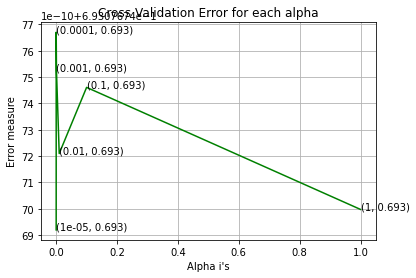

For values of best alpha =  1e-05 The train log loss is: 0.6930619242604941
For values of best alpha =  1e-05 The cross validation log loss is: 0.6930767469201162
For values of best alpha =  1e-05 The test log loss is: 0.6930582973928793


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_curve, auc
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_over, y_over)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_over, y_over)
    predict_y = sig_clf.predict_proba(cv_stop_auto_buy_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_over, y_over)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_over, y_over)

predict_y_train = sig_clf.predict_proba(X_over)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_over, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_stop_auto_buy_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(test_stop_auto_buy_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))



In [ ]:
predict_y_train_roc=clf.predict(X_over)
predict_y_test_roc=clf.predict(test_stop_auto_buy_feature_onehotCoding)

In [ ]:
y_train_one_hot=[]
for each in y_over:
    if each=='No':
        y_train_one_hot.append(0)
    else:
        y_train_one_hot.append(1)
y_test_one_hot=[]
for each in y_test:
    if each=='No':
        y_test_one_hot.append(0)
    else:
        y_test_one_hot.append(1)


In [ ]:
predict_y_train_roc_one_hot=[]
for each in predict_y_train_roc:
    if each=='No':
        predict_y_train_roc_one_hot.append(0)
    else:
        predict_y_train_roc_one_hot.append(1)
predict_y_test_roc_one_hot=[]
for each in predict_y_test_roc:
    if each=='No':
        predict_y_test_roc_one_hot.append(0)
    else:
        predict_y_test_roc_one_hot.append(1)

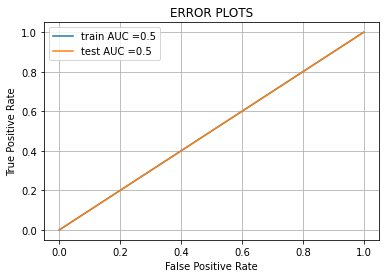

In [ ]:
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train_one_hot,predict_y_train_roc_one_hot)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test_one_hot, predict_y_test_roc_one_hot)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_train=f1_score(y_train_one_hot, predict_y_train_roc_one_hot,average='macro')
f1_test=f1_score(y_test_one_hot, predict_y_test_roc_one_hot,average='macro')
print("F1-SCORE FOR TRAIN DATA IS :"+str(f1_train)+" F1-SCORE FOR TEST DATA IS :"+str(f1_test))

F1-SCORE FOR TRAIN DATA IS :0.3333333333333333 F1-SCORE FOR TEST DATA IS :0.006647578298114019


In [ ]:
# oe_constraint
# one-hot encoding of stop_auto_buy feature.
from sklearn.feature_extraction.text import CountVectorizer
oe_constraint_vectorizer = CountVectorizer()
train_oe_constraint_feature_onehotCoding = oe_constraint_vectorizer.fit_transform(train_df['oe_constraint'])
test_oe_constraint_feature_onehotCoding = oe_constraint_vectorizer.transform(test_df['oe_constraint'])
cv_oe_constraint_feature_onehotCoding = oe_constraint_vectorizer.transform(cv_df['oe_constraint'])

In [ ]:
print("train_oe_constraint_feature_onehotCoding is converted feature using one-hot encoding method. The shape of stop_auto_buy feature:", train_oe_constraint_feature_onehotCoding.shape)

train_oe_constraint_feature_onehotCoding is converted feature using one-hot encoding method. The shape of stop_auto_buy feature: (1080204, 2)


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_oe_constraint_feature_onehotCoding  , y_train)
print(Counter(y_over))

Counter({'No': 1072977, 'Yes': 1072977})


For values of alpha =  1e-05 The log loss is: 0.6929666458893748
For values of alpha =  0.0001 The log loss is: 0.6929666455910806
For values of alpha =  0.001 The log loss is: 0.692966645726585
For values of alpha =  0.01 The log loss is: 0.6929666458332369
For values of alpha =  0.1 The log loss is: 0.6929666457941955
For values of alpha =  1 The log loss is: 0.692966645820753


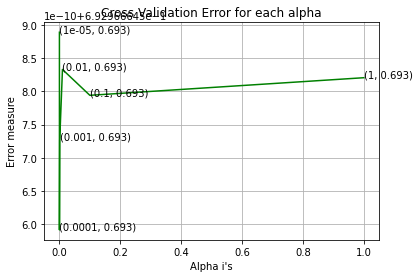

For values of best alpha =  0.0001 The train log loss is: 0.6930092480364997
For values of best alpha =  0.0001 The cross validation log loss is: 0.6929666455910806
For values of best alpha =  0.0001 The test log loss is: 0.6929470620942147


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_curve, auc
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_over, y_over)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_over, y_over)
    predict_y = sig_clf.predict_proba(cv_oe_constraint_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_over, y_over)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_over, y_over)

predict_y_train = sig_clf.predict_proba(X_over)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_over, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_oe_constraint_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(test_oe_constraint_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))



In [ ]:
predict_y_train_roc=clf.predict(X_over)
predict_y_test_roc=clf.predict(test_oe_constraint_feature_onehotCoding)

In [ ]:
y_train_one_hot=[]
for each in y_over:
    if each=='No':
        y_train_one_hot.append(0)
    else:
        y_train_one_hot.append(1)
y_test_one_hot=[]
for each in y_test:
    if each=='No':
        y_test_one_hot.append(0)
    else:
        y_test_one_hot.append(1)


In [ ]:
predict_y_train_roc_one_hot=[]
for each in predict_y_train_roc:
    if each=='No':
        predict_y_train_roc_one_hot.append(0)
    else:
        predict_y_train_roc_one_hot.append(1)
predict_y_test_roc_one_hot=[]
for each in predict_y_test_roc:
    if each=='No':
        predict_y_test_roc_one_hot.append(0)
    else:
        predict_y_test_roc_one_hot.append(1)

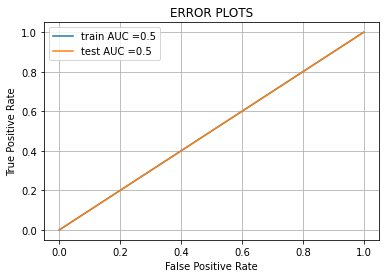

In [ ]:
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train_one_hot,predict_y_train_roc_one_hot)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test_one_hot, predict_y_test_roc_one_hot)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_train=f1_score(y_train_one_hot, predict_y_train_roc_one_hot,average='macro')
f1_test=f1_score(y_test_one_hot, predict_y_test_roc_one_hot,average='macro')
print("F1-SCORE FOR TRAIN DATA IS :"+str(f1_train)+" F1-SCORE FOR TEST DATA IS :"+str(f1_test))

F1-SCORE FOR TRAIN DATA IS :0.3333333333333333 F1-SCORE FOR TEST DATA IS :0.006647578298114019


In [ ]:
# oe_constraint
# one-hot encoding of stop_auto_buy feature.
from sklearn.feature_extraction.text import CountVectorizer
deck_risk_vectorizer = CountVectorizer()
train_deck_risk_feature_onehotCoding = deck_risk_vectorizer.fit_transform(train_df['deck_risk'])
test_deck_risk_feature_onehotCoding = deck_risk_vectorizer.transform(test_df['deck_risk'])
cv_deck_risk_feature_onehotCoding = deck_risk_vectorizer.transform(cv_df['deck_risk'])

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_deck_risk_feature_onehotCoding  , y_train)
print(Counter(y_over))

Counter({'No': 1072977, 'Yes': 1072977})


For values of alpha =  1e-05 The log loss is: 0.6904990765399857
For values of alpha =  0.0001 The log loss is: 0.6904990774912931
For values of alpha =  0.001 The log loss is: 0.6904990768648508
For values of alpha =  0.01 The log loss is: 0.690499076923934
For values of alpha =  0.1 The log loss is: 0.6904990763840685
For values of alpha =  1 The log loss is: 0.6904990769782812


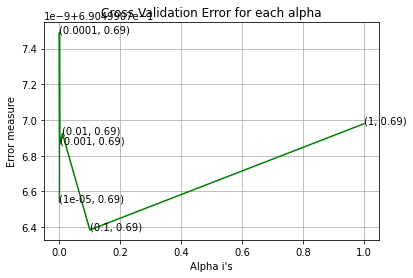

For values of best alpha =  0.1 The train log loss is: 0.6903503896752494
For values of best alpha =  0.1 The cross validation log loss is: 0.6904990763840685
For values of best alpha =  0.1 The test log loss is: 0.6903572596602765


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_curve, auc
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_over, y_over )
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_over, y_over )
    predict_y = sig_clf.predict_proba(cv_deck_risk_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_over, y_over )
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_over, y_over )

predict_y_train = sig_clf.predict_proba(X_over)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_over, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_deck_risk_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(test_deck_risk_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))



In [ ]:
predict_y_train_roc=clf.predict(X_over)
predict_y_test_roc=clf.predict(test_deck_risk_feature_onehotCoding)

In [ ]:
y_train_one_hot=[]
for each in y_over:
    if each=='No':
        y_train_one_hot.append(0)
    else:
        y_train_one_hot.append(1)
y_test_one_hot=[]
for each in y_test:
    if each=='No':
        y_test_one_hot.append(0)
    else:
        y_test_one_hot.append(1)

In [ ]:
predict_y_train_roc_one_hot=[]
for each in predict_y_train_roc:
    if each=='No':
        predict_y_train_roc_one_hot.append(0)
    else:
        predict_y_train_roc_one_hot.append(1)
predict_y_test_roc_one_hot=[]
for each in predict_y_test_roc:
    if each=='No':
        predict_y_test_roc_one_hot.append(0)
    else:
        predict_y_test_roc_one_hot.append(1)

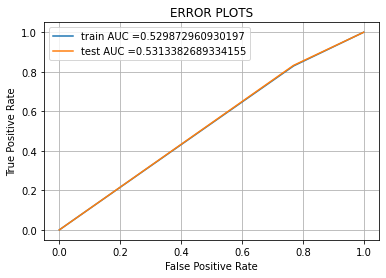

In [ ]:
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train_one_hot,predict_y_train_roc_one_hot)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test_one_hot, predict_y_test_roc_one_hot)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_train=f1_score(y_train_one_hot, predict_y_train_roc_one_hot,average='macro')
f1_test=f1_score(y_test_one_hot, predict_y_test_roc_one_hot,average='macro')
print("F1-SCORE FOR TRAIN DATA IS :"+str(f1_train)+" F1-SCORE FOR TEST DATA IS :"+str(f1_test))

F1-SCORE FOR TRAIN DATA IS :0.48339103762945085 F1-SCORE FOR TEST DATA IS :0.19428807795399544


#### CONCLUSION OF MODEL BASED ANALYSIS
from the aboe model based analysis of categorical features it can be concluded that :
As dec_risk & stop_auto_buy  have goof F1  score and ROC-AUC value ,they can be impportant features for classification

### COREALTION AMONG NUMERICAL FETAURE 

<AxesSubplot:>

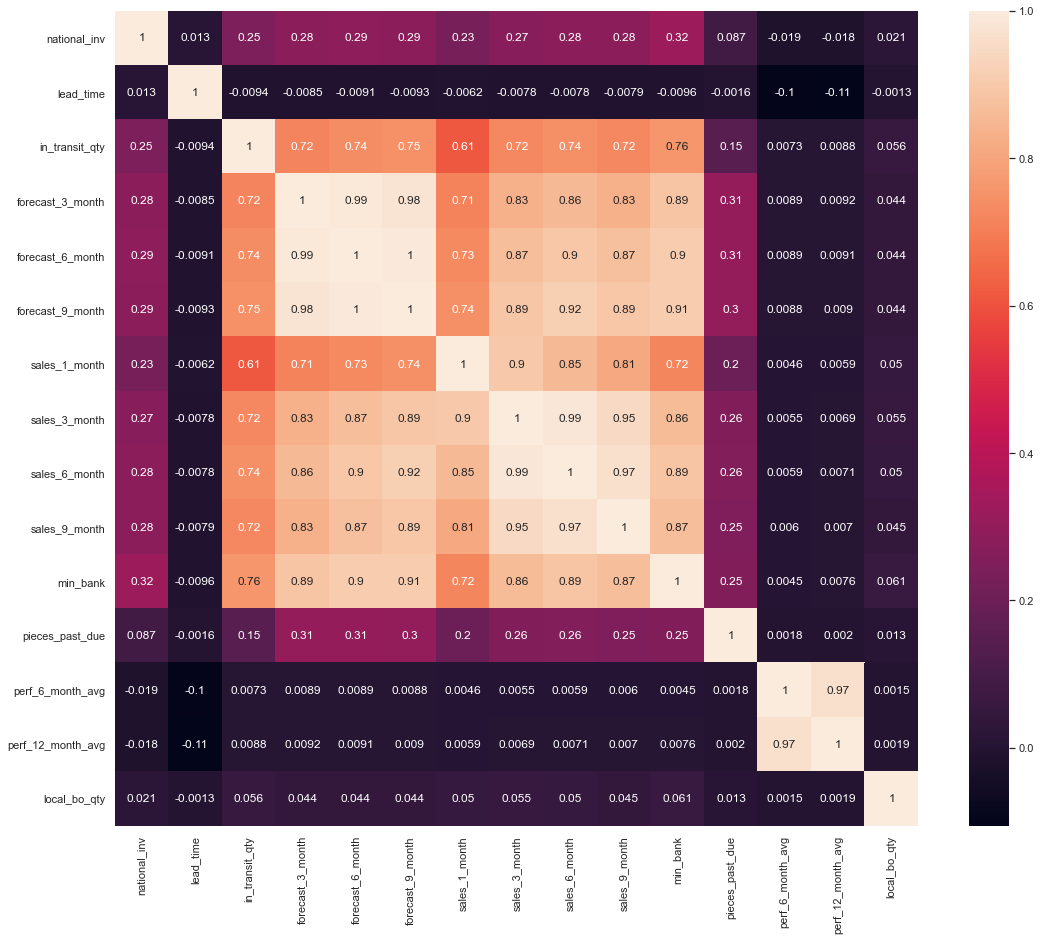

In [ ]:
corelation = df.corr()
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot = True)

#### Analysis
forecast_3_month,forecast_6_month,forecast_9_month are highly co-realated with each other with a degree of 0.98-0.99
sales_1_month,sales_3_month,,sales_6_month,,sales_9_month are higly postivly co-rellated. with degree of 0.72-0.99.
Perf_6_month_avg,perf_12_month_avg are highly positively co-realted to each other with a degree of 0.95.
As there are too many co-related features we should not use linear models for classification

### CO-RELATION BETWEEN CATEGORICAL VARIABLE

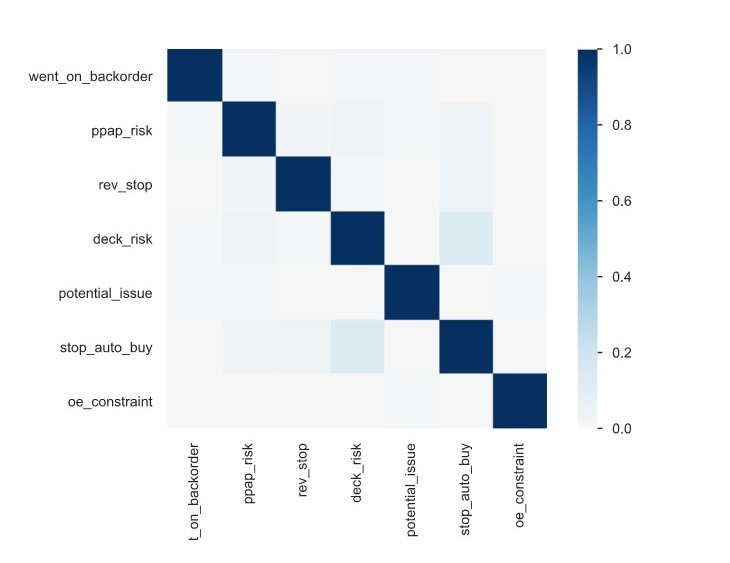

In [ ]:
# https://www.spss-tutorials.com/cramers-v-what-and-why/
from IPython.display import Image
Image("Cramér's V (φc).jpg")

#### target variable is not co-related with any of the feature,but there exist a weak postive co-relation between stop_auto_buy and rev_stop & this analysis might beneficial in bussiness.

### CO-RELATION BETWEEN CATEGORICAL AND NUMERICAL VARIABLE

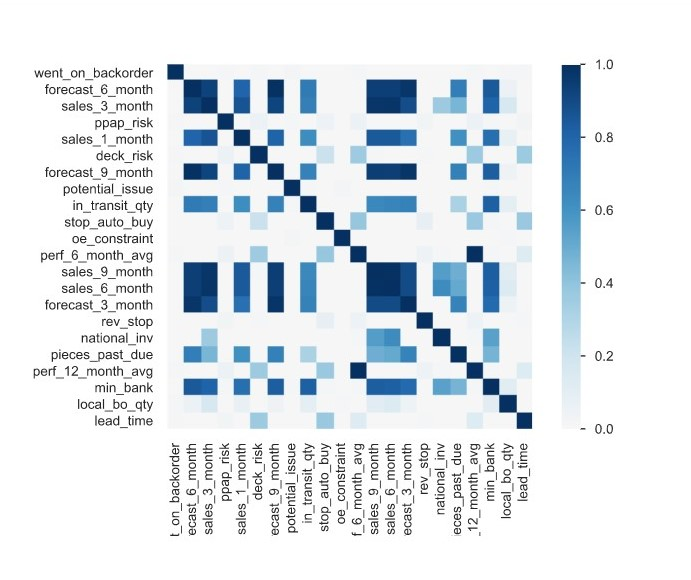

In [ ]:
Image("Phik (φk).jpg")

#### target variable is not co-related with any of the real valued feature,but there exist a weak postive co-relation between dec_risk and perf_6_month_avg ,stop_auto_buy and perf_6_month_avg,& stop_auto_buy and perf_12_month_avg this analysis might beneficial bussiness.


## CONCLUSION OF EDA:

##### (i)Data is highly imbalanced,we have to handel it by some sampling techniques.
##### (ii)Most of the features are co-related to each other ,we should not use linear models for clasiification.
##### (iii)Most real valued features are having outliers in the range >90th quantile.
##### (iv)Many real valued features () are right skewd but can be transformed to gaussion by applying log transformation & they should be transformed so that we can get rid of extreme outliers.
##### (v)Real valued featres like local_bo_qty   have more than 80% values as 0,so they should be  dropped while building a model.
#### (vi)No such single feature or  combined featurs(two-features) exist which are efficient enough for classification.
##### (vii)As data is highly imbalanced micro preission,recall & F1 score can be a good performance matrix.
#### (viii)There exist some weak postive co-relation between categorical variable but not with target variable.
#### (ix)There exist some weak postive co-relation between categorical & numerical variable but not with traget variable.

# 5.MISSING VALUE IMPUTATION AND LABEL ENCODING

#### Filling Nan and Missing values

In [209]:
df.isnull().sum()

national_inv              0
lead_time            100886
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [210]:
print((df.perf_6_month_avg  == -99.00).sum())
print((df.perf_12_month_avg  == -99.00).sum())


129454
122036


Lead time has 100893 null values.
As many values in perf_6_month_avg & perf_12_month_avg  are -99 which represnts these are null values & should be filled.
We can fill missing & null values by some central value according to the distribution of that feature.Another better way of filling of missing value is by linear regression if there exist co-realtion between features.Again we should go filling missing values by central value if both the values are missing values.

In [211]:
#Relplace -99 with null values
#https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
import numpy as np
df.perf_6_month_avg .replace({-99.00:np.nan}, inplace=True)
df.perf_12_month_avg .replace({-99.00:np.nan}, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

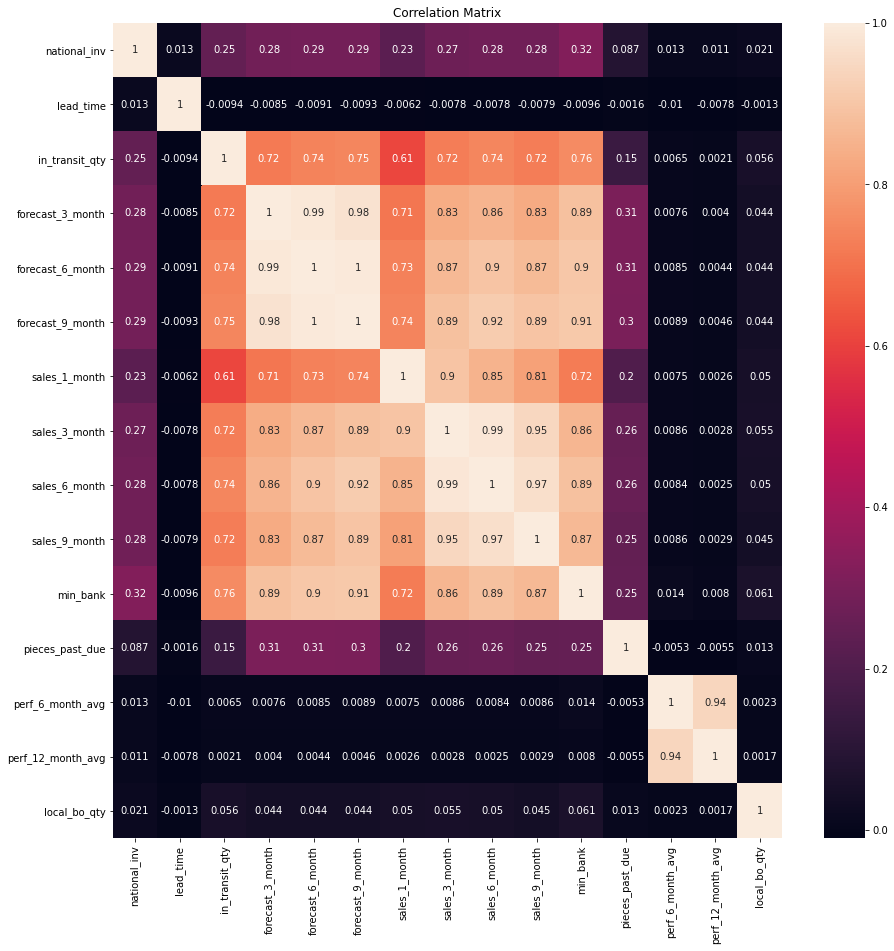

In [212]:
import seaborn as sns
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(15,15))
feature_corr =df.corr()
sns.heatmap(feature_corr, annot=True)
plt.title('Correlation Matrix')

As we can see there exit a strong co-realtion between perf_6_month_avg and perf_12_month_avg,Missing values in both features can be filled linear regression model

In [117]:
X_perf_12_month = df[df.perf_6_month_avg.notnull() & df.perf_12_month_avg.notnull()][['perf_12_month_avg']]
y_perf_6_month = df[df.perf_6_month_avg.notnull() & df.perf_12_month_avg.notnull()]['perf_6_month_avg']

In [118]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_perf_12_month,y_perf_6_month)

LinearRegression()

In [119]:
df[df.perf_6_month_avg.isnull() & df.perf_12_month_avg.notnull()][['perf_12_month_avg']]

,perf_12_month_avg
19,1.00
24,1.00
105,0.00
255,1.00
984,0.25
...,...
1686817,0.44
1686838,0.44
1687121,0.44
1687192,0.44


Predict perf_6_month_avg null values

In [120]:
null_6months = df[df.perf_6_month_avg.isnull() & df.perf_12_month_avg.notnull()][['perf_12_month_avg']]
pred_6months = linmodel.predict(null_6months)

In [121]:
# Fill the null values
all_null_6_months = list(zip(null_6months.index,pred_6months))
for each in all_null_6_months :
    df.at[each[0],'perf_6_month_avg']=each[1]

But we are still left with null values in perf_6_month_avg where perf_12_month_avg is also null,So we have to use some central vale to fill this according to distribution and range

Text(0.5, 1.0, 'perf_6_month_avgs range and distribution')

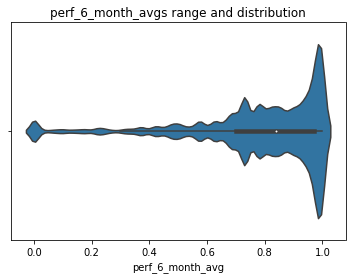

In [122]:
sns.violinplot(df.perf_6_month_avg)
plt.title('perf_6_month_avgs range and distribution')

By looking at the distribution,It is clear that we should fill the remainng missing values by median.

In [123]:
#https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
df.perf_6_month_avg.fillna(df.perf_6_month_avg.median(), inplace=True)

Predict perf_12_month_avg null values

Text(0.5, 1.0, 'perf_12_month_avgs range and distribution')

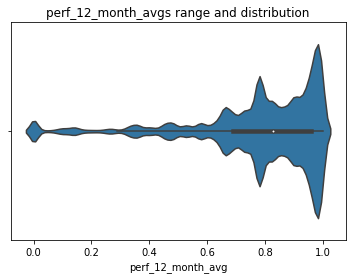

In [124]:
sns.violinplot(df.perf_12_month_avg)
plt.title('perf_12_month_avgs range and distribution')

By looking at the distribution,It is clear that we should fill the remainng missing values by median

In [125]:
df.perf_12_month_avg.fillna(df.perf_12_month_avg.median(), inplace=True)

As lead time has no strong co-realtion with any other feature we can not use linear regression to compute missing values.
We should use some central measure according to the distribution.

Text(0.5, 1.0, 'perf_12_month_avgs range and distribution')

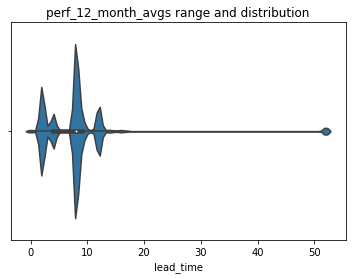

In [126]:
sns.violinplot(df.lead_time)
plt.title('perf_12_month_avgs range and distribution')

By looking at the distribution,It is clear that we should fill the remainng missing values by median.


In [127]:
df.lead_time.fillna(df.perf_12_month_avg.median(), inplace=True)

label encoding for categorical feature

In [213]:
for col in categorical:
    df[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    df[col] = df[col].astype(int)

## 6.Feature enginerring

In [214]:
#train_test_split
from sklearn.model_selection import train_test_split
df_y = df['went_on_backorder']

X_train, X_test, y_train, y_test = train_test_split(df.drop(['went_on_backorder'], axis=1), df_y , random_state = 42 , stratify=df_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

In [215]:
##imputing missing value using itrerative impurator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)
X_cv = imp.transform(X_cv)

In [216]:
from joblib import dump, load
import pickle
with open('missing_value_imputer_.pkl', 'wb') as file:
    pickle.dump(imp, file)

In [223]:
X_train_log, X_cv_log,X_test_log, y_train_log, y_cv_log , y_test_log = X_train, X_cv,X_test, y_train, y_cv , y_test

In [224]:
X_train_robust, X_cv_robust,X_test_robust, y_train_robust, y_cv_robust , y_test_robust = X_train, X_cv,X_test, y_train, y_cv , y_test

In [225]:
log_columns_index = []
for i in skewed_right_features:
    log_columns_index.append(df.columns.get_loc(i))

In [226]:
def log_transform(data):
    sign = np.sign(data[log_columns_index])
#     print(sign)
#     print(data[log_columns_index])
    data[log_columns_index] =  np.log((1.0+abs(data[log_columns_index])).astype('float'))*sign
    return data

In [227]:
##log_transformed_features
X_train_log = np.apply_along_axis(log_transform, 1, X_train_log)
X_cv_log = np.apply_along_axis(log_transform, 1, X_cv_log)
X_test_log = np.apply_along_axis(log_transform, 1, X_test_log)

In [228]:
##robust_scaled_feature
from sklearn.preprocessing import RobustScaler
robust_transformer = RobustScaler().fit(X_train_robust)
X_train_robust = robust_transformer.transform(X_train_robust)
X_cv_robust = robust_transformer.transform(X_cv_robust)
X_test_robust = robust_transformer.transform(X_test_robust)

In [143]:
with open('robust_transform_.pkl', 'wb') as file:
    pickle.dump(robust_transformer, file)

### Feature Engineering Steps

1.) As seen in EDA some features are very much rightly skewed and after log transformation they behave somehow like normal distribution so i have applied log transformation on those features and also as these skewed values can affect modelling we can remove the extreme quantile values by  log tranformation because they are mostly present in majority class and then standarize them.

2.)I have fitted the Robust scaler on train data and tranformed train, test and cv sets. As Robusts scaler considers only IQR for scaling the data the effect of right skewed values while scaling can be mitigated and prepared an another data set.

3.)One-hot encoded target variable and dependent variable with No as 0 and Yes as 1.


## BASELINE MODEL

### on log_transformed features

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [78]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [79]:
def precision_recall_curve(model,X,y_true):
    th = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    pred = model.predict_proba(X)[:,1]
    scores = []
    tpr = []
    fpr = []
    for i in th:
        pred_labels =[]
        for j in pred:
            if j>=i:
                pred_labels.append(1)
            else:
                pred_labels.append(0)
        scores.append([recall_score(y_true,pred_labels,pos_label=1),precision_score(y_true,pred_labels,pos_label=1)])
    xx = [X[0] for X in scores]
    yy = [Y[1] for Y in scores]
    fig = plt.figure(figsize=(6,8))

    ax1 = fig.add_subplot(311)
    ax1.plot(xx,yy,label = 'AUC PR curve'+str(np.round(auc(xx,yy),3)))

    ax1.set_title("Precision - Recall curve")
    ax1.set_xlabel("Recall")
    ax1.set_ylabel("Precision")
    ax1.legend()

In [ ]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
test_scores = []
cv_scores= []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant =1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train_log , y_train)
    test_y_predicted = dclf.predict(X_test_log)
    test_score=f1_score(y_test,test_y_predicted,average="macro")
    cv_y_predicted = dclf.predict(X_cv_log)
    cv_score=f1_score(y_cv,cv_y_predicted,average="macro")
    test_scores.append(test_score)
    cv_scores.append(cv_score)

Macro F1-Score after applying dummy model on log_transformed cv data is :  0.33832927162980525


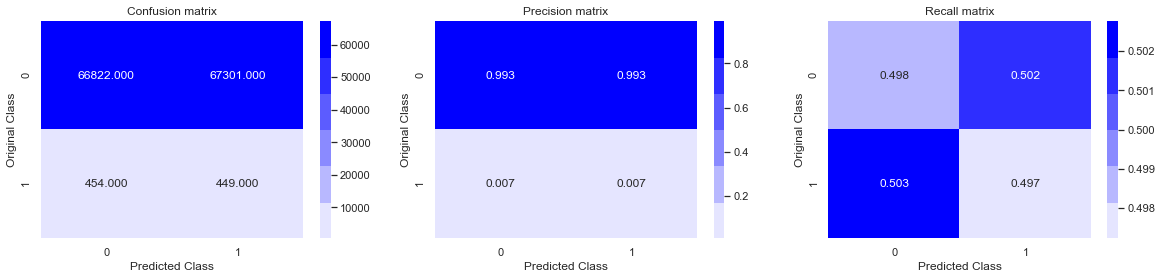

Macro F1-Score after applying dummy model on log_transformed test data is :  0.33887365401111513


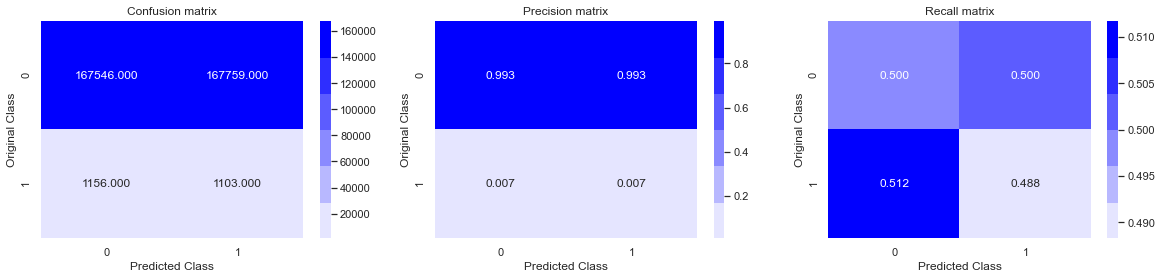

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_log, y_train)
y_cv_log_predicted=dummy_clf.predict(X_cv_log)
y_test_log_predicted=dummy_clf.predict(X_test_log)
print("Macro F1-Score after applying dummy model on log_transformed cv data is : " , f1_score(y_cv,y_cv_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_log_predicted)
print("Macro F1-Score after applying dummy model on log_transformed test data is : " , f1_score(y_test,y_test_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_log_predicted)

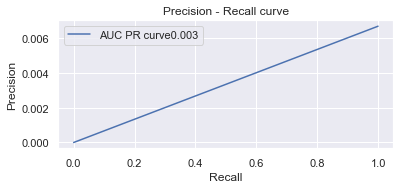

In [ ]:
precision_recall_curve(dummy_clf,X_test_log,y_test)

In [ ]:
print("ROC-AUC score after applying dummy model on log_transformed data : " , roc_auc_score(y_test, y_test_log_predicted))

ROC-AUC score after applying dummy model on log_transformed data :  0.4939757621847383


## Different Machine Learning Models

### Random forest Classifier

#### on log transformd data

In [ ]:
from sklearn.preprocessing import RobustScaler
# robust_transformer = RobustScaler().fit(X_train_robust)
# X_train_robust = robust_transformer.transform(X_train_robust)
# X_cv_robust = robust_transformer.transform(X_cv_robust)
# X_test_robust = robust_transformer.transform(X_test_robust)

# X_train_log = np.apply_along_axis(log_transform, 1, X_train_log)
# X_cv_log = np.apply_along_axis(log_transform, 1, X_cv_log)
# X_test_log = np.apply_along_axis(log_transform, 1, X_test_log)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(class_weight = "balanced" , n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] , 'max_depth' : [1,3,5,7]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=15)
rf = clf.fit(X_train_log, y_train)
print("Best Params : " , rf.best_params_)
print("Best Score : " , rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=1, n_estimators=10...............................
[CV 1/5; 1/24] END .............max_depth=1, n_estimators=10; total time=   6.2s
[CV 2/5; 1/24] START max_depth=1, n_estimators=10...............................
[CV 2/5; 1/24] END .............max_depth=1, n_estimators=10; total time=   2.3s
[CV 3/5; 1/24] START max_depth=1, n_estimators=10...............................
[CV 3/5; 1/24] END .............max_depth=1, n_estimators=10; total time=   2.2s
[CV 4/5; 1/24] START max_depth=1, n_estimators=10...............................
[CV 4/5; 1/24] END .............max_depth=1, n_estimators=10; total time=   2.3s
[CV 5/5; 1/24] START max_depth=1, n_estimators=10...............................
[CV 5/5; 1/24] END .............max_depth=1, n_estimators=10; total time=   2.3s
[CV 1/5; 2/24] START max_depth=1, n_estimators=50...............................
[CV 1/5; 2/24] END .............max_depth=1, n_

In [ ]:
best_model = RandomForestClassifier(n_estimators = rf.best_params_['n_estimators'],max_depth =rf.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
best_model.fit(X_train_log, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=300, n_jobs=-1)

Macro F1-Score after applying dummy model on log_transformed cv data is :  0.49894417364531113


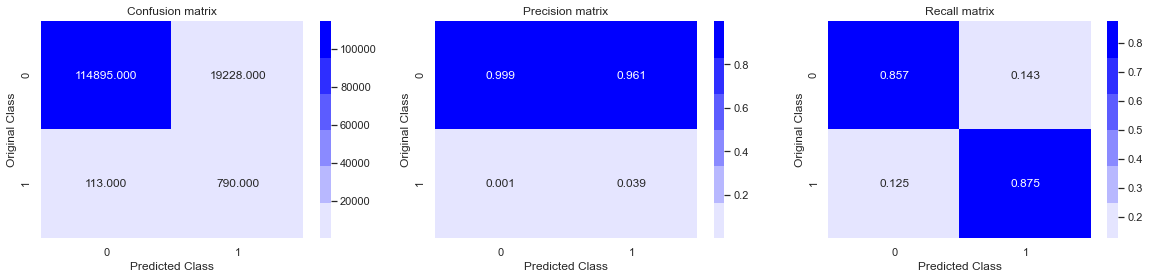

Macro F1-Score after applying dummy model on log_transformed test data is :  0.49855896295413327


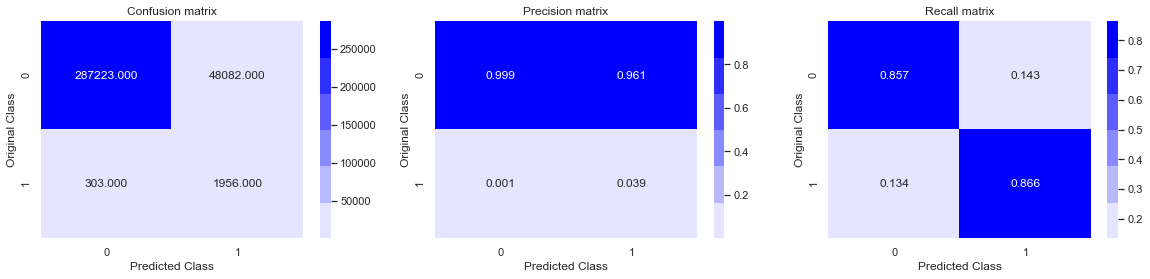

In [ ]:
y_cv_log_predicted=best_model.predict(X_cv_log)
y_test_log_predicted=best_model.predict(X_test_log)
print("Macro F1-Score after applying dummy model on log_transformed cv data is : " , f1_score(y_cv,y_cv_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_log_predicted)
print("Macro F1-Score after applying dummy model on log_transformed test data is : " , f1_score(y_test,y_test_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_log_predicted) 

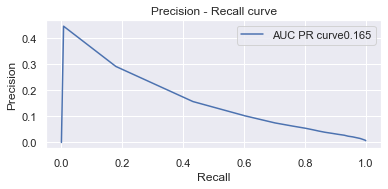

In [ ]:
precision_recall_curve(best_model,X_test_log,y_test)

In [ ]:
print("ROC-AUC score after applying random classifier model on log_transformed data : " , roc_auc_score(y_test, y_test_log_predicted))

ROC-AUC score after applying random classifier model on log_transformed data :  0.8612360259582498


#### On robust scaled data

In [ ]:
model = RandomForestClassifier(class_weight = "balanced" , n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] , 'max_depth' : [1,3,5,7]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
rf = clf.fit(X_train_robust , y_train)
print("Best Params : " , rf.best_params_)
print("Best Score : " , rf.best_score_)

Best Params :  {'max_depth': 7, 'n_estimators': 300}
Best Score :  0.9376886147182015


In [ ]:
best_model = RandomForestClassifier(n_estimators = rf.best_params_['n_estimators'],max_depth =rf.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
best_model.fit(X_train_robust, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=300, n_jobs=-1)

Macro F1-Score after applying dummy model on robust_transformed cv data is :  0.5004351494958366


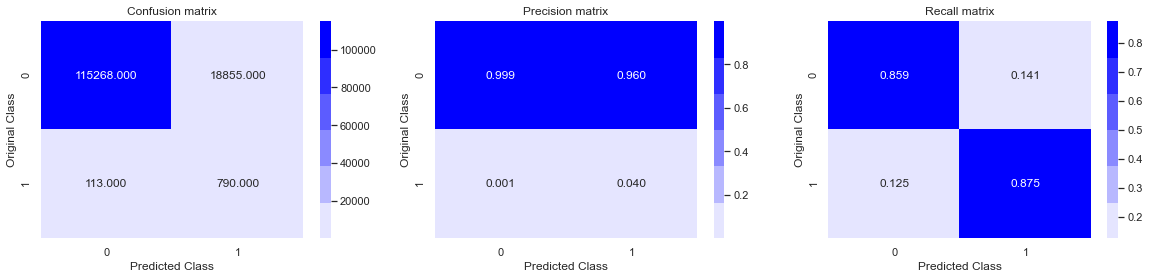

Macro F1-Score after applying dummy model on robust_transformed test data is :  0.4998927562516943


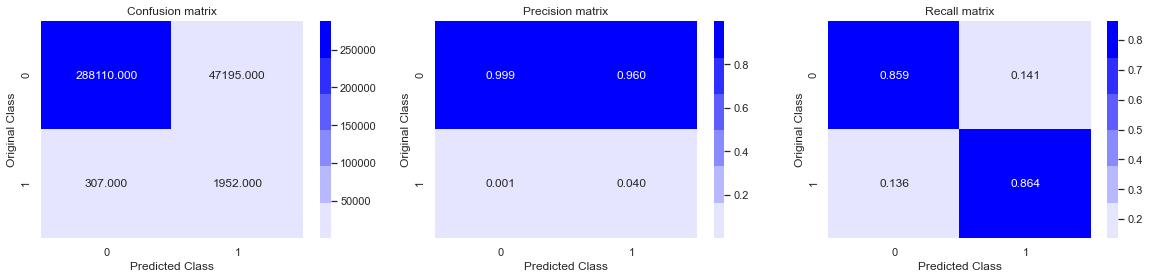

In [ ]:
y_cv_robust_predicted=best_model.predict(X_cv_robust)
y_test_robust_predicted=best_model.predict(X_test_robust)
print("Macro F1-Score after applying dummy model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_robust_predicted)
print("Macro F1-Score after applying dummy model on robust_transformed test data is : " , f1_score(y_test,y_test_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_robust_predicted)

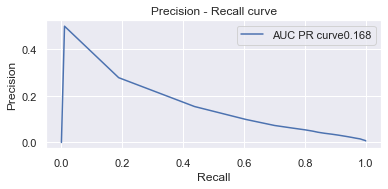

In [ ]:
precision_recall_curve(best_model,X_test_robust,y_test)

In [ ]:
print("ROC-AUC score after applying random classifier on robust_scalled data : " , roc_auc_score(y_test, y_test_robust_predicted))

ROC-AUC score after applying random classifier on robust_scalled data :  0.8616733548286322


### Bagging clasiifier

#### on log transformed data

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier 
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
bc = clf.fit(X_train_log, y_train)
print("Best Params : " , bc.best_params_)
print("Best Score : " , bc.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................
[CV 1/5; 1/6] END ...........................n_estimators=10; total time=  17.3s
[CV 2/5; 1/6] START n_estimators=10.............................................
[CV 2/5; 1/6] END ...........................n_estimators=10; total time=   5.6s
[CV 3/5; 1/6] START n_estimators=10.............................................
[CV 3/5; 1/6] END ...........................n_estimators=10; total time=   5.1s
[CV 4/5; 1/6] START n_estimators=10.............................................
[CV 4/5; 1/6] END ...........................n_estimators=10; total time=   5.1s
[CV 5/5; 1/6] START n_estimators=10.............................................
[CV 5/5; 1/6] END ...........................n_estimators=10; total time=   5.1s
[CV 1/5; 2/6] START n_estimators=50.............................................
[CV 1/5; 2/6] END ...........................n_es

In [ ]:
best_model = BalancedBaggingClassifier(n_estimators = bc.best_params_['n_estimators'],n_jobs=-1)
best_model.fit(X_train_log, y_train)

BalancedBaggingClassifier(n_estimators=1000, n_jobs=-1)

Macro F1-Score after applying dummy model on log_transformed cv data is :  0.5438262630181324


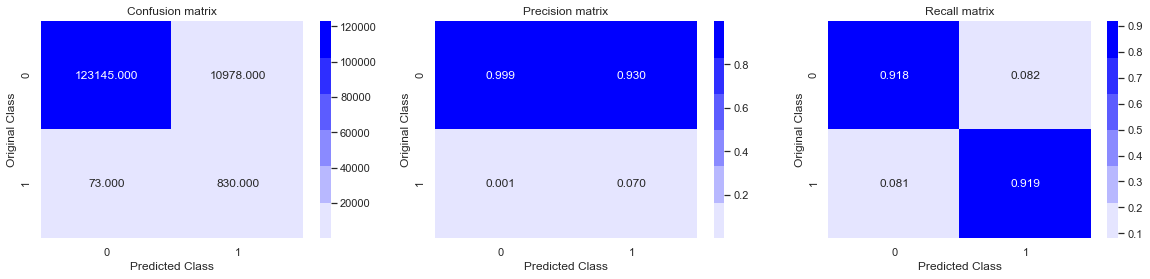

Macro F1-Score after applying dummy model on log_transformed test data is :  0.5428998825727505


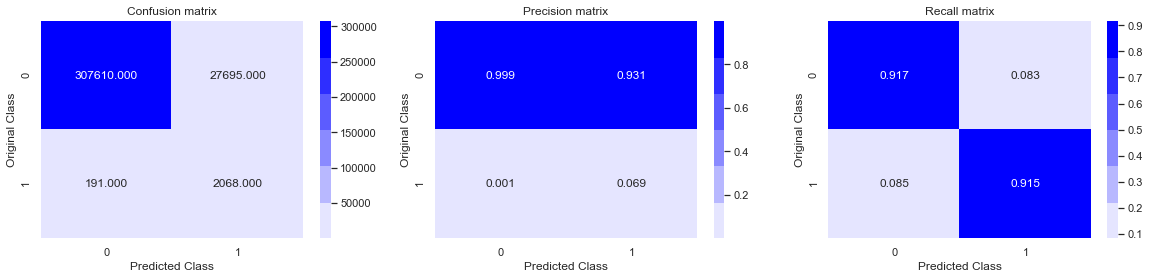

In [ ]:
y_cv_log_predicted=best_model.predict(X_cv_log)
y_test_log_predicted=best_model.predict(X_test_log)
print("Macro F1-Score after applying dummy model on log_transformed cv data is : " , f1_score(y_cv,y_cv_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_log_predicted)
print("Macro F1-Score after applying dummy model on log_transformed test data is : " , f1_score(y_test,y_test_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_log_predicted)

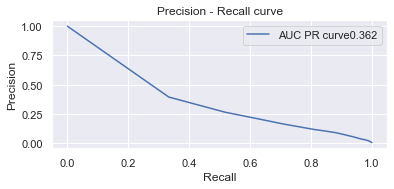

In [ ]:
precision_recall_curve(best_model,X_test_log,y_test)

In [ ]:
print("ROC-AUC score after applying bagging classifier on log_transformed data : " , roc_auc_score(y_test,y_test_log_predicted))

ROC-AUC score after applying bagging classifier on log_transformed data :  0.9164264359051931


#### On robust-scalled data

In [146]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.model_selection import GridSearchCV
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
bc = clf.fit(X_train_robust, y_train)
print("Best Params : " , bc.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................
[CV 1/5; 1/6] END ..............n_estimators=10;, score=0.954 total time=  12.7s
[CV 2/5; 1/6] START n_estimators=10.............................................
[CV 2/5; 1/6] END ..............n_estimators=10;, score=0.955 total time=   5.5s
[CV 3/5; 1/6] START n_estimators=10.............................................
[CV 3/5; 1/6] END ..............n_estimators=10;, score=0.958 total time=   6.1s
[CV 4/5; 1/6] START n_estimators=10.............................................
[CV 4/5; 1/6] END ..............n_estimators=10;, score=0.962 total time=   5.4s
[CV 5/5; 1/6] START n_estimators=10.............................................
[CV 5/5; 1/6] END ..............n_estimators=10;, score=0.960 total time=   5.5s
[CV 1/5; 2/6] START n_estimators=50.............................................
[CV 1/5; 2/6] END ..............n_estimators=50;,

In [147]:
best_model =BalancedBaggingClassifier(n_estimators = bc.best_params_['n_estimators'],n_jobs=-1)
best_model.fit(X_train_robust, y_train)

BalancedBaggingClassifier(n_estimators=1000, n_jobs=-1)

In [148]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [232]:
y_cv_robust_predicted=best_model.predict(X_cv_robust)
y_test_robust_predicted=best_model.predict(X_test_robust)
print("Macro F1-Score after applying dummy model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_robust_predicted)
print("Macro F1-Score after applying dummy model on robust_transformed test data is : " , f1_score(y_test,y_test_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_robust_predicted)

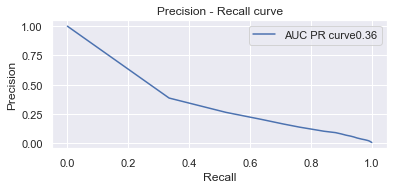

In [ ]:
precision_recall_curve(best_model,X_test_robust,y_test)

In [ ]:
print("ROC-AUC score after applying bagging classifier on robust_scalled data : " , roc_auc_score(y_test, y_test_robust_predicted))

ROC-AUC score after applying bagging classifier on robust_scalled data :  0.9162803002973137


### XGBOOST

#### on log_transformed data

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
xgb = clf.fit(X_train_log, y_train,verbose=10)
print("Best Params : " , xgb.best_params_)
print("Best Score : " , xgb.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 1/6] END ...........................n_estimators=10; total time=   7.1s
[CV 2/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 1/6] END ...........................n_estimators=10; total time=   6.5s
[CV 3/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 1/6] END ...........................n_estimators=10; total time=   6.7s
[CV 4/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 1/6] END ...........................n_estimators=10; total time=   6.3s
[CV 5/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 1/6] END ...........................n_estimators=10; total time=   5.9s
[CV 1/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 2/6] END ...........................n_estimators=50; total time=  23.4s
[CV 2/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 2/6] END ...........................n_estimators=50; total time=  20.0s
[CV 3/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 2/6] END ...........................n_estimators=50; total time=  19.6s
[CV 4/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 2/6] END ...........................n_estimators=50; total time=  19.8s
[CV 5/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 2/6] END ...........................n_estimators=50; total time=  19.7s
[CV 1/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 3/6] END ..........................n_estimators=100; total time=  38.6s
[CV 2/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 3/6] END ..........................n_estimators=100; total time=  38.9s
[CV 3/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 3/6] END ..........................n_estimators=100; total time=  38.8s
[CV 4/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 3/6] END ..........................n_estimators=100; total time=  38.9s
[CV 5/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 3/6] END ..........................n_estimators=100; total time=  38.9s
[CV 1/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 2/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 4/6] END ..........................n_estimators=300; total time= 2.1min
[CV 3/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 4/6] END ..........................n_estimators=300; total time= 3.2min
[CV 4/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 4/6] END ..........................n_estimators=300; total time= 3.2min
[CV 5/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 4/6] END ..........................n_estimators=300; total time= 3.2min
[CV 1/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 5/6] END ..........................n_estimators=500; total time= 5.3min
[CV 2/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 5/6] END ..........................n_estimators=500; total time= 5.4min
[CV 3/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 5/6] END ..........................n_estimators=500; total time= 5.3min
[CV 4/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 5/6] END ..........................n_estimators=500; total time= 5.2min
[CV 5/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 5/6] END ..........................n_estimators=500; total time= 5.3min
[CV 1/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 6/6] END .........................n_estimators=1000; total time=10.5min
[CV 2/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 6/6] END .........................n_estimators=1000; total time=10.4min
[CV 3/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 6/6] END .........................n_estimators=1000; total time=10.4min
[CV 4/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 6/6] END .........................n_estimators=1000; total time=10.4min
[CV 5/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 6/6] END .........................n_estimators=1000; total time=10.4min


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params :  {'n_estimators': 1000}
Best Score :  0.9723145697295517


In [ ]:
best_model  = XGBClassifier(n_estimators = xgb.best_params_['n_estimators'],nthread=-1)
best_model.fit(X_train_log, y_train,verbose=10)

[21:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Macro F1-Score after applying XGboost model on robust_transformed cv data is :  0.7509654573011146


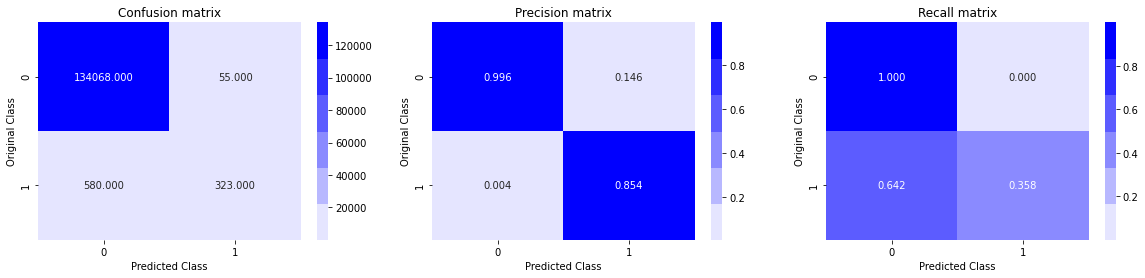

Macro F1-Score after applying XGboost model on robust_transformed test data is :  0.7276128302723885


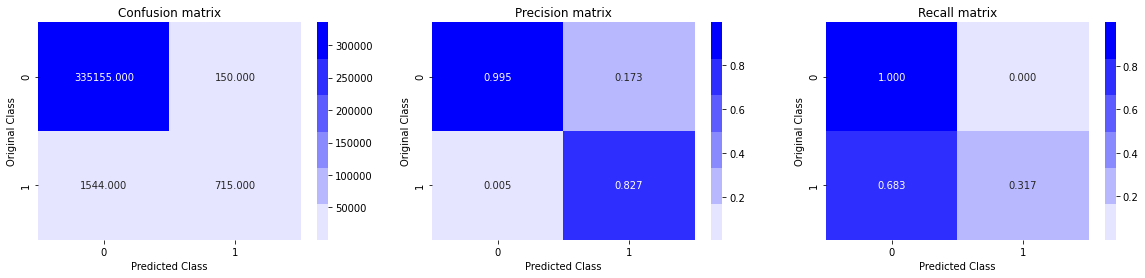

In [ ]:
y_cv_log_predicted=best_model.predict(X_cv_log)
y_test_log_predicted=best_model.predict(X_test_log)
print("Macro F1-Score after applying XGboost model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_log_predicted)
print("Macro F1-Score after applying XGboost model on robust_transformed test data is : " , f1_score(y_test,y_test_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_log_predicted) 

C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


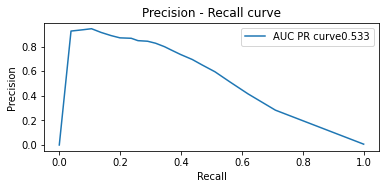

In [ ]:
precision_recall_curve(best_model,X_test_log,y_test)

In [ ]:
print("ROC-AUC score after applying XGboost classifier on log_transformed data : " , roc_auc_score(y_test, y_test_log_predicted))

ROC-AUC score after applying XGboost classifier on log_transformed data :  0.6580321884763444


#### on robust scalled data

In [ ]:
model = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
xgb = clf.fit(X_train_robust, y_train,verbose=10)
print("Best Params : " , xgb.best_params_)
print("Best Score : " , xgb.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 1/6] END ...........................n_estimators=10; total time=   4.8s
[CV 2/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 1/6] END ...........................n_estimators=10; total time=   4.8s
[CV 3/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 1/6] END ...........................n_estimators=10; total time=   4.8s
[CV 4/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 1/6] END ...........................n_estimators=10; total time=   4.7s
[CV 5/5; 1/6] START n_estimators=10.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 1/6] END ...........................n_estimators=10; total time=   4.7s
[CV 1/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 2/6] END ...........................n_estimators=50; total time=  20.2s
[CV 2/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 2/6] END ...........................n_estimators=50; total time=  20.2s
[CV 3/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 2/6] END ...........................n_estimators=50; total time=  20.2s
[CV 4/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 2/6] END ...........................n_estimators=50; total time=  20.2s
[CV 5/5; 2/6] START n_estimators=50.............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 2/6] END ...........................n_estimators=50; total time=  20.4s
[CV 1/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 3/6] END ..........................n_estimators=100; total time=  39.3s
[CV 2/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 3/6] END ..........................n_estimators=100; total time=  39.4s
[CV 3/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 3/6] END ..........................n_estimators=100; total time=  40.0s
[CV 4/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 3/6] END ..........................n_estimators=100; total time=  39.2s
[CV 5/5; 3/6] START n_estimators=100............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 3/6] END ..........................n_estimators=100; total time=  39.1s
[CV 1/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 2/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 3/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 4/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 5/5; 4/6] START n_estimators=300............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 4/6] END ..........................n_estimators=300; total time= 1.9min
[CV 1/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 5/6] END ..........................n_estimators=500; total time= 3.2min
[CV 2/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 5/6] END ..........................n_estimators=500; total time= 3.2min
[CV 3/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 5/6] END ..........................n_estimators=500; total time= 3.2min
[CV 4/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 5/6] END ..........................n_estimators=500; total time= 3.3min
[CV 5/5; 5/6] START n_estimators=500............................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 5/6] END ..........................n_estimators=500; total time= 3.2min
[CV 1/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 6/6] END .........................n_estimators=1000; total time= 6.4min
[CV 2/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 6/6] END .........................n_estimators=1000; total time= 6.5min
[CV 3/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 6/6] END .........................n_estimators=1000; total time= 6.4min
[CV 4/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 6/6] END .........................n_estimators=1000; total time= 6.4min
[CV 5/5; 6/6] START n_estimators=1000...........................................


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 6/6] END .........................n_estimators=1000; total time= 6.4min


C:\Users\amiya\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params :  {'n_estimators': 1000}
Best Score :  0.9723139549591073


In [ ]:
best_model  = XGBClassifier(n_estimators = xgb.best_params_['n_estimators'],nthread=-1)
best_model.fit(X_train_robust, y_train,verbose=10)

[23:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Macro F1-Score after applying XGboost model on robust_transformed cv data is :  0.7509654573011146


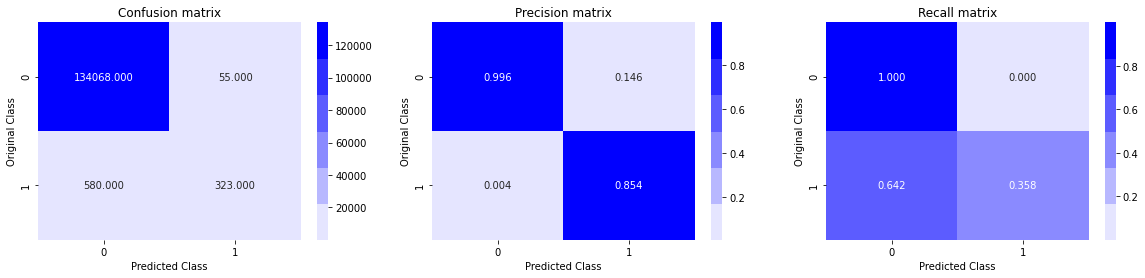

Macro F1-Score after applying XGboost model on robust_transformed test data is :  0.727538844915871


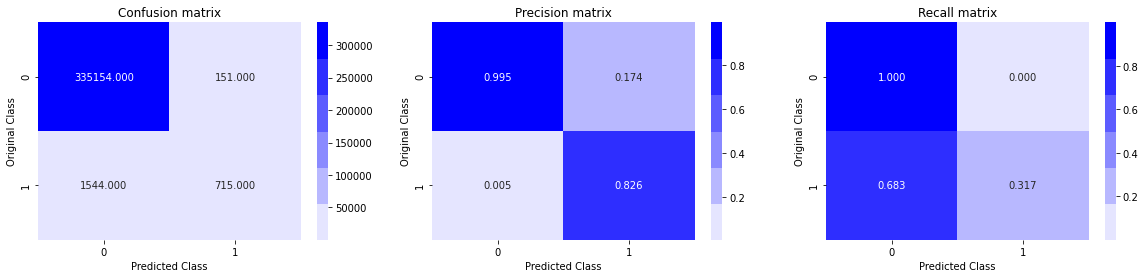

In [ ]:
y_cv_robust_predicted=best_model.predict(X_cv_robust)
y_test_robust_predicted=best_model.predict(X_test_robust)
print("Macro F1-Score after applying XGboost model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_robust_predicted)
print("Macro F1-Score after applying XGboost model on robust_transformed test data is : " , f1_score(y_test,y_test_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_robust_predicted) 

C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


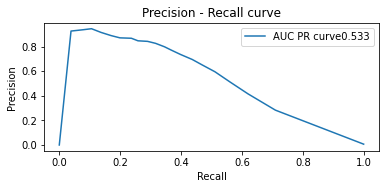

In [ ]:
precision_recall_curve(best_model,X_test_robust,y_test)

In [ ]:
print("ROC-AUC score after applying XGboost classifier on robust_scalled data : " , roc_auc_score(y_test, y_test_robust_predicted))

ROC-AUC score after applying XGboost classifier on robust_scalled data :  0.6580306972966722


### AdaBoost

#### on log_transformed data

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
Adb = clf.fit(X_train_log, y_train)
print("Best Params : " , Adb.best_params_)
print("Best Score : " , Adb.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................
[CV 1/5; 1/6] END ...........................n_estimators=10; total time=  31.4s
[CV 2/5; 1/6] START n_estimators=10.............................................
[CV 2/5; 1/6] END ...........................n_estimators=10; total time=  28.9s
[CV 3/5; 1/6] START n_estimators=10.............................................
[CV 3/5; 1/6] END ...........................n_estimators=10; total time=  29.0s
[CV 4/5; 1/6] START n_estimators=10.............................................
[CV 4/5; 1/6] END ...........................n_estimators=10; total time=  28.7s
[CV 5/5; 1/6] START n_estimators=10.............................................
[CV 5/5; 1/6] END ...........................n_estimators=10; total time=  31.1s
[CV 1/5; 2/6] START n_estimators=50.............................................
[CV 1/5; 2/6] END ...........................n_es

In [ ]:
best_model  = AdaBoostClassifier(n_estimators = Adb.best_params_['n_estimators'])
best_model.fit(X_train_log, y_train)

AdaBoostClassifier(n_estimators=1000)

Macro F1-Score after applying Adaboost model on robust_transformed cv data is :  0.5411416643295229


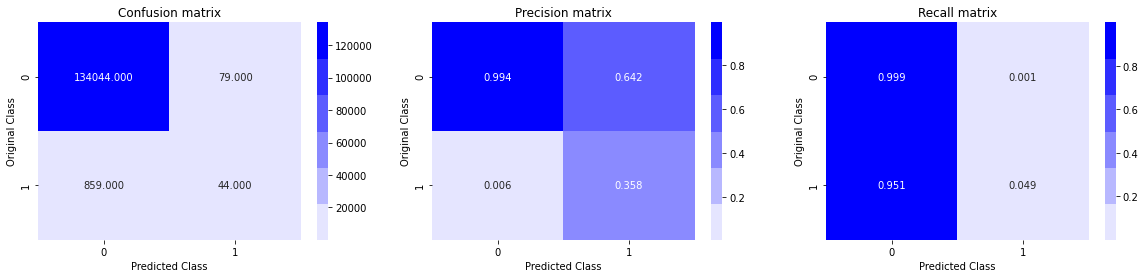

Macro F1-Score after applying Adaboost model on robust_transformed test data is :  0.5395691791813153


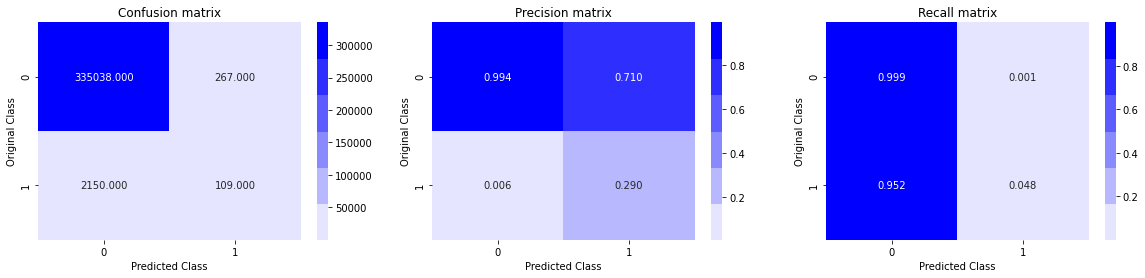

In [ ]:
y_cv_log_predicted=best_model.predict(X_cv_log)
y_test_log_predicted=best_model.predict(X_test_log)
print("Macro F1-Score after applying Adaboost model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_log_predicted)
print("Macro F1-Score after applying Adaboost model on robust_transformed test data is : " , f1_score(y_test,y_test_log_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_log_predicted) 0.5237275743723552 0.148 0.5411416643295229 0.5395691791813153

C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

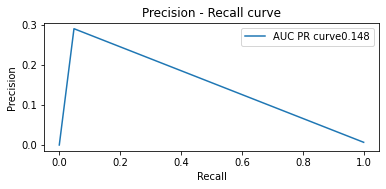

In [ ]:
precision_recall_curve(best_model,X_test_log,y_test)

In [ ]:
print("ROC-AUC score after applying Adboost classifier on log_transformed data : " , roc_auc_score(y_test, y_test_log_predicted))

ROC-AUC score after applying Adboost classifier on log_transformed data :  0.5237275743723552


#### on robust scalled data

In [ ]:
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc',verbose=10)
Adb = clf.fit(X_train_robust, y_train)
print("Best Params : " , Adb.best_params_)
print("Best Score : " , Adb.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=10.............................................
[CV 1/5; 1/6] END ...........................n_estimators=10; total time=  21.1s
[CV 2/5; 1/6] START n_estimators=10.............................................
[CV 2/5; 1/6] END ...........................n_estimators=10; total time=  15.5s
[CV 3/5; 1/6] START n_estimators=10.............................................
[CV 3/5; 1/6] END ...........................n_estimators=10; total time=  15.5s
[CV 4/5; 1/6] START n_estimators=10.............................................
[CV 4/5; 1/6] END ...........................n_estimators=10; total time=  15.5s
[CV 5/5; 1/6] START n_estimators=10.............................................
[CV 5/5; 1/6] END ...........................n_estimators=10; total time=  15.7s
[CV 1/5; 2/6] START n_estimators=50.............................................
[CV 1/5; 2/6] END ...........................n_es

In [ ]:
best_model  = AdaBoostClassifier(n_estimators = Adb.best_params_['n_estimators'])
best_model.fit(X_train_robust, y_train)

AdaBoostClassifier(n_estimators=1000)

Macro F1-Score after applying Adaboost model on robust_transformed cv data is :  0.5411416643295229


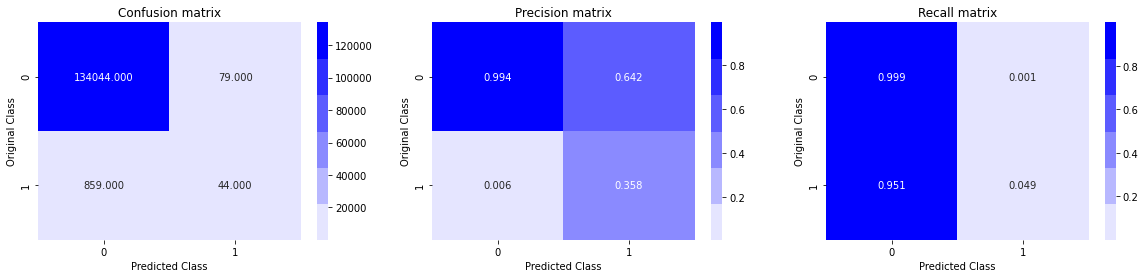

Macro F1-Score after applying Adaboost model on robust_transformed test data is :  0.5395691791813153


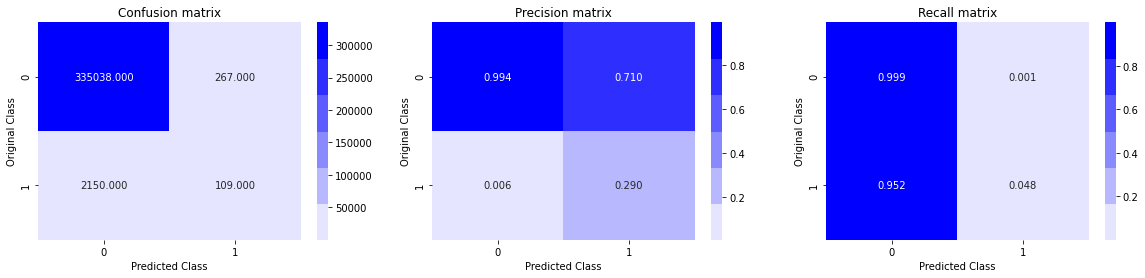

In [ ]:
y_cv_robust_predicted=best_model.predict(X_cv_robust)
y_test_robust_predicted=best_model.predict(X_test_robust)
print("Macro F1-Score after applying Adaboost model on robust_transformed cv data is : " , f1_score(y_cv,y_cv_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_cv,y_cv_robust_predicted)
print("Macro F1-Score after applying Adaboost model on robust_transformed test data is : " , f1_score(y_test,y_test_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(y_test,y_test_robust_predicted) 

C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

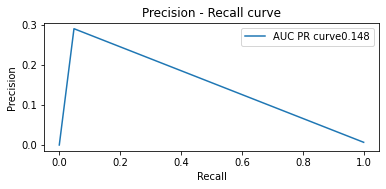

In [ ]:
precision_recall_curve(best_model,X_test_robust,y_test)

In [ ]:
print("ROC-AUC score after applying ADaboost classifier on robust_scalled data : " , roc_auc_score(y_test, y_test_robust_predicted))

ROC-AUC score after applying ADaboost classifier on robust_scalled data :  0.5237275743723552


### Custom_ensembling

In [60]:
## spliting data
data_y = df['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(df.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
D1_x, D2_x, D1_y, D2_y = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.50)

In [61]:
##https://stackoverflow.com/questions/23455728/scikit-learn-balanced-subsampling
def split_dataset_into_k_subsample(k,X,y,boot_strap_size):
    k_X_sub_samples = []
    k_y_sub_samples = []
    for i in range(k):
        subsample= []
        class_label = [0,1]
        for j in class_label:
            samples = np.where(y.values==j)[0]
            index_range = range(samples.shape[0])
            indexes = np.random.choice(index_range, size=boot_strap_size, replace=True)
            subsample.extend(samples[indexes])
        k_X_sub_samples.append(X[subsample])
        k_y_sub_samples.append(y.values[subsample])
    return k_X_sub_samples , k_y_sub_samples

In [62]:
from sklearn.tree import DecisionTreeClassifier
decission_tree_base_model = DecisionTreeClassifier()

In [63]:
def k_learners_fitting(decission_tree_base_model,X,y):
    k_decission_tree_base_models = []
    for i in tqdm(range(len(X))):
        X[i], y[i] = shuffle(X[i], y[i], random_state=0)
        k_decission_tree_base_models.append(decission_tree_base_model.fit(X[i],y[i]))
    return k_decission_tree_base_models

In [64]:
def data_create_meta_model(decission_tree_base_models, X , y):
    x_meta_ = []
    y_meta = []
    for i in tqdm(range(X.shape[0])):
        for j in range(len(decission_tree_base_models)):
            predicted = decission_tree_base_models[j].predict(X[i].reshape(1,-1))
            x_meta.append(predicted)
            y_meta.append(np.array(y.values[i]))
    return x_meta,y_meta

In [68]:
from sklearn.linear_model import LogisticRegression
meta_model = XGBClassifier(n_estimators = 300,nthread=-1)

In [69]:
def fitting_meta_model(meta_model,x,y):
    model =meta_model.fit(x, y)
    return model

In [70]:
k_X_sub_samples , k_y_sub_samples = split_dataset_into_k_subsample(100,D1_x.values,D1_y,1000)

In [71]:
from tqdm import tqdm
from sklearn.utils import shuffle
k_decission_tree_base_models = k_learners_fitting(decission_tree_base_model,k_X_sub_samples , k_y_sub_samples)

100%|██████████| 100/100 [00:00<00:00, 130.59it/s]


In [72]:
x_meta,y_meta = data_create_meta_model(k_decission_tree_base_models,D2_x.values,D2_y)

100%|██████████| 11554/11554 [01:21<00:00, 142.31it/s]


In [73]:
import numpy as np
meta_model_final = fitting_meta_model(meta_model,np.array(x_meta).reshape(-1,1) , np.array(y_meta).reshape(-1,1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
test_x,test_y=data_create_meta_model(k_decission_tree_base_models,X_test.values,y_test)

100%|██████████| 5778/5778 [00:40<00:00, 141.29it/s]


Macro F1-Score after applying Cutom ene=sembling model on robust_transformed cv data is :  0.4973466724662897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


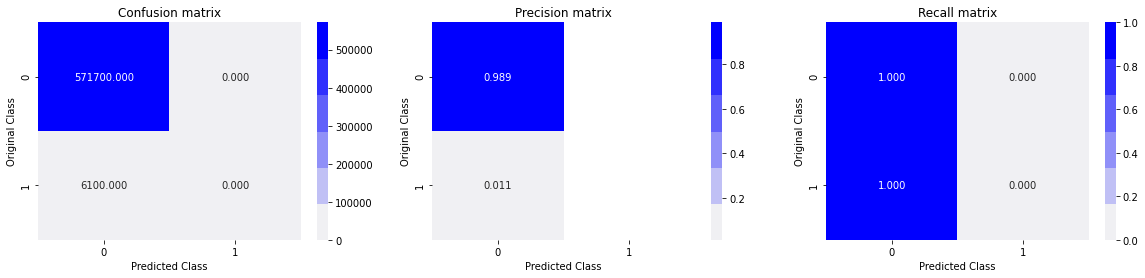

In [80]:
from sklearn.metrics import f1_score
y_test_robust_predicted=meta_model_final.predict(test_x)
print("Macro F1-Score after applying Cutom ene=sembling model on robust_transformed cv data is : " , f1_score(test_y,y_test_robust_predicted,pos_label = 1,average = 'macro'))
plot_confusion_matrix(test_y,y_test_robust_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


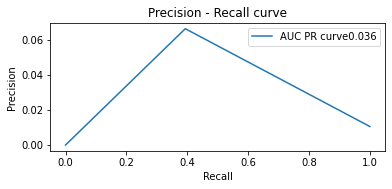

In [81]:
precision_recall_curve(meta_model_final,test_x,test_y)

In [82]:
print("ROC-AUC score after applying Custom ensembleing classifier on robust_scalled data : " , roc_auc_score(test_y, y_test_robust_predicted))

ROC-AUC score after applying Custom ensembleing classifier on robust_scalled data :  0.5


## Summary of different models

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Models", "DATA","Test AUC","AUC PR CURVE","MACRO F1-SCORE ON CV","MACRO F1 ON TEST"]
x.add_row(["Random Forest", "Log_transformed", "0.8612360259582498","0.165","0.49894417364531113","0.49855896295413327"])
x.add_row(["Random Forest", "Robust scalled ", "0.8616733548286322","0.168","0.5004351494958366","0.4998927562516943"])
x.add_row(["Bgging classifier", "Log trandformed", "0.9164264359051931","0.362","0.5438262630181324","0.5428998825727505"])
x.add_row(["Bgging classifier", "Robust scalled", "0.9162803002973137","0.36","0.5437723407083701","0.5426233347104226"])
x.add_row(["XGBOOST", "LOG_TRANSFORMED", "0.6580321884763444","0.533","0.7509654573011146 ","0.7276128302723885"])
x.add_row(["XGBOOST", "Robust scalled", "0.6580306972966722","0.533","0.7509654573011146","0.727538844915871"])
x.add_row(["Adaboost", "LOG_TRANSFORMED", "0.5237275743723552","0.148","0.5411416643295229","0.5395691791813153"])
x.add_row(["Adaboost", "Robust_scalled", "0.5237275743723552","0.148","0.5411416643295229","0.5395691791813153"])
x.add_row(["Custom_Ensembling", "Robust_scalled", "0.5","0.036","","0.4973466724662897"])


print(x)

+-------------------+-----------------+--------------------+--------------+----------------------+---------------------+
|       Models      |       DATA      |      Test AUC      | AUC PR CURVE | MACRO F1-SCORE ON CV |   MACRO F1 ON TEST  |
+-------------------+-----------------+--------------------+--------------+----------------------+---------------------+
|   Random Forest   | Log_transformed | 0.8612360259582498 |    0.165     | 0.49894417364531113  | 0.49855896295413327 |
|   Random Forest   | Robust scalled  | 0.8616733548286322 |    0.168     |  0.5004351494958366  |  0.4998927562516943 |
| Bgging classifier | Log trandformed | 0.9164264359051931 |    0.362     |  0.5438262630181324  |  0.5428998825727505 |
| Bgging classifier |  Robust scalled | 0.9162803002973137 |     0.36     |  0.5437723407083701  |  0.5426233347104226 |
|      XGBOOST      | LOG_TRANSFORMED | 0.6580321884763444 |    0.533     | 0.7509654573011146   |  0.7276128302723885 |
|      XGBOOST      |  Robust sc

#### Bagging classifier on log transformed data performs better than other models and it has better Aur pr curve of research paper.It has also good recall score both the class and good F1 score.
##### Recall  on cv data: 0.917
##### Recall  on test data :0.95
##### Macro F1 score on cv data:0.5438
##### Macro F1 score on test data:0.5428


#### EDA summary:

(i)Data is highly imbalanced,we have to handel it by some sampling techniques.

 (ii)Most of the features are co-related to each other ,we should not use linear models for clasiification.

(iii)Most real valued features are having outliers in the range >90th quantile.

 (iv)Many real valued features () are right skewd but can be transformed to gaussion by applying log transformation & they should be transformed so that we can get rid of extreme outliers.

 (v)Real valued featres like local_bo_qty   have more than 80% values as 0,so they should be  dropped while building a model.

(vi)No such single feature or  combined featurs(two-features) exist which are efficient enough for classification.

(vii)As data is highly imbalanced micro preission,recall & F1 score can be a good performance matrix.

(viii)There exist some weak postive co-relation between categorical variable but not with target variable.

(ix)As we can see there exit a strong co-realtion between perf_6_month_avg and perf_12_month_avg,Missing values in both features can be filled linear regression model

 (x)There exist some weak postive co-relation between categorical & numerical variable but not with traget variable.

#### Feature Engineering Summary:

1.) As seen in EDA some features are very much rightly skewed and after log transformation they behave somehow like normal distribution so i have applied log transformation on those features and also as these skewed values can affect modelling we can remove the extreme quantile values by  log tranformation because they are mostly present in majority class and then standarize them.

2.)I have fitted the Robust scaler on train data and tranformed train, test and cv sets. As Robusts scaler considers only IQR for scaling the data the effect of right skewed values while scaling can be mitigated and prepared an another data set.

3.)One-hot encoded target variable and dependent variable with No as 0 and Yes as 1.


#### Modelling summary:

First of all ,BaseLine model(Dummy model) has AUC 0.003 for PR curve  and test Auc 0.493975.


I have used  all total 9 models  & Bagging classifier on log transfomed data  has performed better than others.It's Auc PR curve is 0.362 which is way higher than Research Paper AUC pr curve(0.307).

It has also good Recall and F1 score for train and cv data 

Recall  on cv data: 0.917

Recall  on test data :0.95

Macro F1 score on cv data:0.5438

Macro F1 score on test data:0.5428

